# Deciphering Road Accidents: Predictive Analytics for Road Accident Severity


<img src="car.jpg" alt="Car Image" width="800" height="400" />


## Business Understanding


### Why this Topic
Road accidents are a major concern worldwide, causing injuries and deaths that have a profound impact on families and communities. In Kenya, road accidents remain a significant public health issue, with thousands of people losing their lives each year due to road-related incidents. Our dataset is Not specific to Kenya.  According to the World Health Organization (WHO), road traffic injuries are among the top 10 leading causes of death worldwiede, highlighting the urgent need for effective prevention strategies. By studying the reasons behind these accidents and identifying hidden patterns and risk factors, we can develop targeted interventions to improve road safety and reduce the number of accidents, injuries, and fatalities on roads worldwide.

### Domain
This project applies to the transportation and public safety domain, with potential implications for government agencies, transportation companies, and advocacy groups.
### Target Audience
Government policymakers, transportation experts, safety agencies, and the general public will benefit from insights and recommendations generated by this analysis.
### Real-World Impact
Implementation of findings could lead to a reduction in road accidents, injuries, fatalities, and associated economic costs on a global scale.

## Objectives

1. **Identify Key Predictive Factors:** Analyze various factors including roadway conditions, environmental influences, and driver behavior to identify the most significant predictors of crash occurrences. This analysis will serve as the foundation for developing the predictive model.
2. **Build a Predictive Model for Crash Severity:** Construct and train a predictive model to accurately forecast the severity of road accidents, categorizing outcomes as non-injury, minor, serious, or fatal. This model will leverage identified key factors and apply machine learning techniques to predict outcomes based on real-time and historical data.
3. **Develop an Early Warning System:** Create a system that uses the predictive model to identify high-risk areas and times for potential accidents. This system will enable stakeholders, such as traffic management centers and law enforcement agencies, to implement proactive measures including enhanced surveillance and targeted road safety campaigns.
4. **Optimize Resource Allocation with Predictive Analytics:** Utilize the predictive model to improve the allocation of emergency response and medical resources. By forecasting the likelihood and severity of accidents in specific areas, this objective aims to ensure that resources are more strategically deployed, enhancing response times and operational efficiency.

### Data source
The dataset utilized for this analysis was obtained from the official New Zealand Government data website. It encompasses comprehensive information regarding road accidents spanning from the year 2000 through April 2024 during the time this project was done. 

# Exploratory Data Analysis

### Understanding the data

In [1]:
# Importing the necessary libraries
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import pickle


In [2]:
#Loading the dataset
df = pd.read_csv("data.csv")


In [3]:
#Checking out the first 10 rows
df.head(10)

,X,Y,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,...,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB
0,178.031840,-38.669793,1,NaN,544801.0,0.0,NaN,0.0,2.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
1,175.264695,-37.785862,2,NaN,528900.0,0.0,NaN,0.0,2.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
2,174.751715,-36.708328,3,NaN,507000.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,Urban,1.0,NaN,NaN,Fine,Null
3,172.394398,-43.609495,4,NaN,597513.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Fine,Null
4,168.385299,-46.417826,5,NaN,611500.0,0.0,NaN,0.0,1.0,NaN,...,NaN,NaN,0.0,0.0,Urban,1.0,NaN,NaN,Fine,Null
5,169.739754,-46.262517,6,30.0,607300.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Fine,Null
6,174.982435,-41.159414,7,NaN,568101.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Light rain,Null
7,174.937477,-37.062911,8,NaN,525420.0,0.0,NaN,0.0,1.0,NaN,...,NaN,NaN,1.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
8,175.235256,-37.751316,9,NaN,528403.0,0.0,NaN,0.0,2.0,NaN,...,NaN,NaN,0.0,0.0,Open,0.0,NaN,NaN,Fine,Null
9,174.874776,-36.964072,10,NaN,523601.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,Urban,0.0,1.0,0.0,Fine,Null


In [4]:
#Checking the data shape
df.shape

(821744, 72)

In [5]:
# Checking out the data types in the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821744 entries, 0 to 821743
Data columns (total 72 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   X                          821744 non-null  float64
 1   Y                          821744 non-null  float64
 2   OBJECTID                   821744 non-null  int64  
 3   advisorySpeed              31344 non-null   float64
 4   areaUnitID                 821647 non-null  float64
 5   bicycle                    821739 non-null  float64
 6   bridge                     332913 non-null  float64
 7   bus                        821739 non-null  float64
 8   carStationWagon            821739 non-null  float64
 9   cliffBank                  332913 non-null  float64
 10  crashDirectionDescription  821744 non-null  object 
 11  crashFinancialYear         821744 non-null  object 
 12  crashLocation1             821744 non-null  object 
 13  crashLocation2             82

**Observations**
* Some columns have no data at all
* Some rows have missing data
* Some rows have the wrong data type

In [6]:
#Summary statistics
df.describe()

,X,Y,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,...,tlaId,trafficIsland,trafficSign,train,tree,truck,unknownVehicleType,vanOrUtility,vehicle,waterRiver
count,821744.000000,821744.000000,8.217440e+05,31344.000000,821647.000000,821739.000000,332913.000000,821739.000000,821739.000000,332913.000000,...,818556.000000,332913.000000,332913.000000,332913.000000,332913.000000,821739.000000,821739.000000,821739.000000,332913.000000,332913.000000
mean,174.268497,-39.324055,6.541132e+05,54.437851,546241.601791,0.028963,0.013724,0.015870,1.311054,0.106319,...,52.409900,0.028815,0.048709,0.001511,0.101555,0.080399,0.003057,0.175788,0.025046,0.009967
std,5.565359,2.970823,3.797024e+05,18.175564,32537.949166,0.171136,0.117603,0.126396,0.784490,0.309588,...,24.000807,0.168825,0.216970,0.038841,0.305681,0.283694,0.056963,0.410052,0.158098,0.099696
min,-176.760762,-46.904849,1.000000e+00,15.000000,500100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,174.198951,-41.231382,3.296288e+05,40.000000,519400.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,174.784685,-37.889268,6.553465e+05,55.000000,536642.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,175.229901,-36.908110,9.881782e+05,65.000000,573523.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,76.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,178.544357,-34.430214,1.318963e+06,95.000000,626801.000000,5.000000,4.000000,3.000000,11.000000,3.000000,...,76.000000,4.000000,4.000000,1.000000,3.000000,5.000000,3.000000,6.000000,4.000000,2.000000


### Data cleaning

Handling Missing Values and Duplicates

In [7]:
# checkig for duplicates
df.duplicated().sum()

0

There are no duplicates in the dataset

Columns that are identifiers and those not relevant to our study could be dropped. They seem to be less relevant for the analysis:
'OBJECTID', 'areaUnitID', 'meshblockId', 'tlaId', 'tlaName'

In [8]:
columns_to_drop = ['OBJECTID', 'areaUnitID', 'meshblockId', 'tlaId',
                   'tlaName', 'crashFinancialYear',
                   'objectThrownOrDropped']
df.drop(columns=columns_to_drop, inplace=True)

In [9]:
df.shape

(821744, 65)

In [10]:
# Calculate the percentage of missing values for each column
missing_percent = (df.isnull().sum() / len(df)) * 100

# Identify columns where 100% of the data is missing
columns_that_100_percent_missing = missing_percent[missing_percent == 100].index.tolist()

print(columns_that_100_percent_missing)



['crashRoadSideRoad', 'intersection']


In [11]:
# Drop columns 100% missing data
df = df.drop(columns=['crashRoadSideRoad', 'intersection'])

From the column description, some columns are simmilar and therefore can be grouped together.

**Vehicle type**s involved can be grouped together into a singe column.

**Obstacles** on the road can also be grouped together.

**Physical features** involved in the road can as well be grouped together.

**Weather columns** can be grouped together as well, to reduce the dimensionality of the data.



In [12]:
#Grouping the columns into simmilar types

vehicles_involved = [
    'bicycle', 'bus', 'carStationWagon', 'moped', 'motorcycle', 'schoolBus',
    'suv', 'taxi', 'truck', 'vanOrUtility', 'otherVehicleType', 'train','unknownVehicleType']

obstacle_columns = [
    'guardRail', 'trafficSign', 'trafficIsland', 'phoneBoxEtc', 'kerb',
    'roadworks', 'debris', 'ditch', 'fence', 'houseOrBuilding','otherObject',
    'postOrPole', 'strayAnimal', 'trafficSign', 'tree', 'bridge', 'cliffBank',
    'waterRiver', 'overBank', 'slipOrFlood' ]


In [13]:
# Creating a column to have sum of all the obsacles hit during an accident.

def sum_obstacles(row):
    total_obstacles = 0
    for obstacle in obstacle_columns:
        # Add up the counts of each obstacle if greater than 0
        if row[obstacle] > 0:
            total_obstacles += int(row[obstacle])
    return total_obstacles

# Apply the function to each row in the DataFrame
df['obstaclesHit'] = df.apply(sum_obstacles, axis=1)

# Display the updated DataFrame to verify the changes
print(df[['obstaclesHit']].head())


   obstaclesHit
0             0
1             0
2             0
3             2
4             0


In [14]:
# Creating a column for the vehicles involved

def format_vehicles(row):
    vehicles_list = []
    for vehicle in vehicles_involved:
        # Check if the count of the vehicle type is greater than 0
        if row[vehicle] > 0:
            vehicles_list.append(f"{vehicle}:{int(row[vehicle])}")
    return ', '.join(vehicles_list)

# Apply the function to each row in the DataFrame
df['vehiclesInvolved'] = df.apply(format_vehicles, axis=1)


In [15]:
# Combining all the columns to be dropped
columns_to_drop = vehicles_involved + obstacle_columns

# Drop the columns
df = df.drop(columns=columns_to_drop)

# Checking the new structure of the DataFrame
df.head()


,X,Y,advisorySpeed,crashDirectionDescription,crashLocation1,crashLocation2,crashSeverity,crashSHDescription,crashYear,directionRoleDescription,...,speedLimit,streetLight,temporarySpeedLimit,trafficControl,urban,vehicle,weatherA,weatherB,obstaclesHit,vehiclesInvolved
0,178.031840,-38.669793,NaN,Null,SH 35 WAINUI,HIRINI ST,Non-Injury Crash,Yes,2011,East,...,50.0,Null,NaN,Give way,Urban,NaN,Fine,Null,0,carStationWagon:2
1,175.264695,-37.785862,NaN,Null,HALL ST,LAKE ROAD,Non-Injury Crash,No,2012,South,...,50.0,Null,NaN,Traffic Signals,Urban,NaN,Fine,Null,0,carStationWagon:2
2,174.751715,-36.708328,NaN,Null,SHARON ROAD,RIDGE ROAD,Minor Crash,No,2012,North,...,50.0,Off,NaN,Nil,Urban,NaN,Fine,Null,0,vanOrUtility:1
3,172.394398,-43.609495,NaN,Null,SPRINGSTON ROLLESTON ROAD,DYNES ROAD,Non-Injury Crash,No,2011,South,...,100.0,Null,NaN,Nil,Open,0.0,Fine,Null,2,carStationWagon:2
4,168.385299,-46.417826,NaN,Null,TWEED ST,INGLEWOOD ROAD,Non-Injury Crash,No,2011,East,...,50.0,Null,NaN,Give way,Urban,NaN,Fine,Null,0,"carStationWagon:1, vanOrUtility:1"


The column vehicle represents stationary attended vehicles involved in the crash, and ParkedVehicle represents stationary unattended that were involved in the crash.


In [16]:
# Combining the unattended vehicles and attended vehicle columns into one.

def categorize_vehicles(row):
    attended = row['vehicle'] > 0 if 'vehicle' in row and not pd.isnull(row['vehicle']) else False
    unattended = row['parkedVehicle'] > 0 if 'parkedVehicle' in row and not pd.isnull(row['parkedVehicle']) else False

    if attended and unattended:
        return 'both'
    elif attended:
        return 'attended'
    elif unattended:
        return 'unattended'
    else:
        return None  # or 'None' or another placeholder if you want to explicitly denote empty cases

# Apply the function to create a new column
df['attended_or_unattended_vehicles'] = df.apply(categorize_vehicles, axis=1)

# Dropping the 'vehicle' and 'parkedVehicle' columns from the DataFrame
df.drop(['vehicle', 'parkedVehicle'], axis=1, inplace=True)

In [17]:
# Creating a new column 'coordinates' by combining 'X' and 'Y'

df['coordinates'] = list(zip(df['Y'], df['X']))

# Dropping the original 'X' and 'Y' columns
df.drop(['X', 'Y'], axis=1, inplace=True)

In [18]:
# Changing the description of crashSHDescription to either State Highway or other.

df['crashSHDescription'] = df['crashSHDescription'].replace({'Yes': 'State Highway', 'No': 'Other'})


In [19]:
df.head()

,advisorySpeed,crashDirectionDescription,crashLocation1,crashLocation2,crashSeverity,crashSHDescription,crashYear,directionRoleDescription,fatalCount,flatHill,...,streetLight,temporarySpeedLimit,trafficControl,urban,weatherA,weatherB,obstaclesHit,vehiclesInvolved,attended_or_unattended_vehicles,coordinates
0,NaN,Null,SH 35 WAINUI,HIRINI ST,Non-Injury Crash,State Highway,2011,East,0.0,Flat,...,Null,NaN,Give way,Urban,Fine,Null,0,carStationWagon:2,None,"(-38.6697929133221, 178.031839712928)"
1,NaN,Null,HALL ST,LAKE ROAD,Non-Injury Crash,Other,2012,South,0.0,Flat,...,Null,NaN,Traffic Signals,Urban,Fine,Null,0,carStationWagon:2,None,"(-37.7858623185866, 175.264694847102)"
2,NaN,Null,SHARON ROAD,RIDGE ROAD,Minor Crash,Other,2012,North,0.0,Hill Road,...,Off,NaN,Nil,Urban,Fine,Null,0,vanOrUtility:1,None,"(-36.7083284317848, 174.751714575468)"
3,NaN,Null,SPRINGSTON ROLLESTON ROAD,DYNES ROAD,Non-Injury Crash,Other,2011,South,0.0,Flat,...,Null,NaN,Nil,Open,Fine,Null,2,carStationWagon:2,None,"(-43.6094954873462, 172.394397590653)"
4,NaN,Null,TWEED ST,INGLEWOOD ROAD,Non-Injury Crash,Other,2011,East,0.0,Flat,...,Null,NaN,Give way,Urban,Fine,Null,0,"carStationWagon:1, vanOrUtility:1",None,"(-46.417825615584, 168.385299484149)"


In [20]:
# A preview of the data so far
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821744 entries, 0 to 821743
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   advisorySpeed                    31344 non-null   float64
 1   crashDirectionDescription        821744 non-null  object 
 2   crashLocation1                   821744 non-null  object 
 3   crashLocation2                   820470 non-null  object 
 4   crashSeverity                    821744 non-null  object 
 5   crashSHDescription               821744 non-null  object 
 6   crashYear                        821744 non-null  int64  
 7   directionRoleDescription         821672 non-null  object 
 8   fatalCount                       821743 non-null  float64
 9   flatHill                         821744 non-null  object 
 10  holiday                          44822 non-null   object 
 11  light                            821744 non-null  object 
 12  mi

### Dealing with missing and null data

In [21]:
# Calculating the percentage of missing values in each column
print((df.isnull().mean() * 100).round(2))

advisorySpeed                      96.19
crashDirectionDescription           0.00
crashLocation1                      0.00
crashLocation2                      0.16
crashSeverity                       0.00
crashSHDescription                  0.00
crashYear                           0.00
directionRoleDescription            0.01
fatalCount                          0.00
flatHill                            0.00
holiday                            94.55
light                               0.00
minorInjuryCount                    0.00
NumberOfLanes                       0.22
pedestrian                         96.76
region                              0.39
roadCharacter                       0.00
roadLane                            0.00
roadSurface                         0.00
seriousInjuryCount                  0.00
speedLimit                          0.10
streetLight                        15.29
temporarySpeedLimit                98.47
trafficControl                      0.00
urban           

Despite the large fractions of missing values, the following columns are fundamental to our analysis:


*   holiday
*   advisorySpeed
*   pedestrian
*   temporarySpeedLimit
*   streetLight
*   attended_or_unattended_vehicles

In [22]:
# Dropping the missing values in holiday column

df = df[df['holiday'].notna() & df['holiday'].str.strip().astype(bool)]

In [23]:
# Dealing with missing data in advisorySpeed and temporarySpeedLimit columns
print(df[['advisorySpeed', 'temporarySpeedLimit']].describe())

       advisorySpeed  temporarySpeedLimit
count    2331.000000           516.000000
mean       54.669670            48.100775
std        17.656056            19.919194
min        15.000000            10.000000
25%        40.000000            30.000000
50%        55.000000            50.000000
75%        65.000000            70.000000
max        95.000000            90.000000


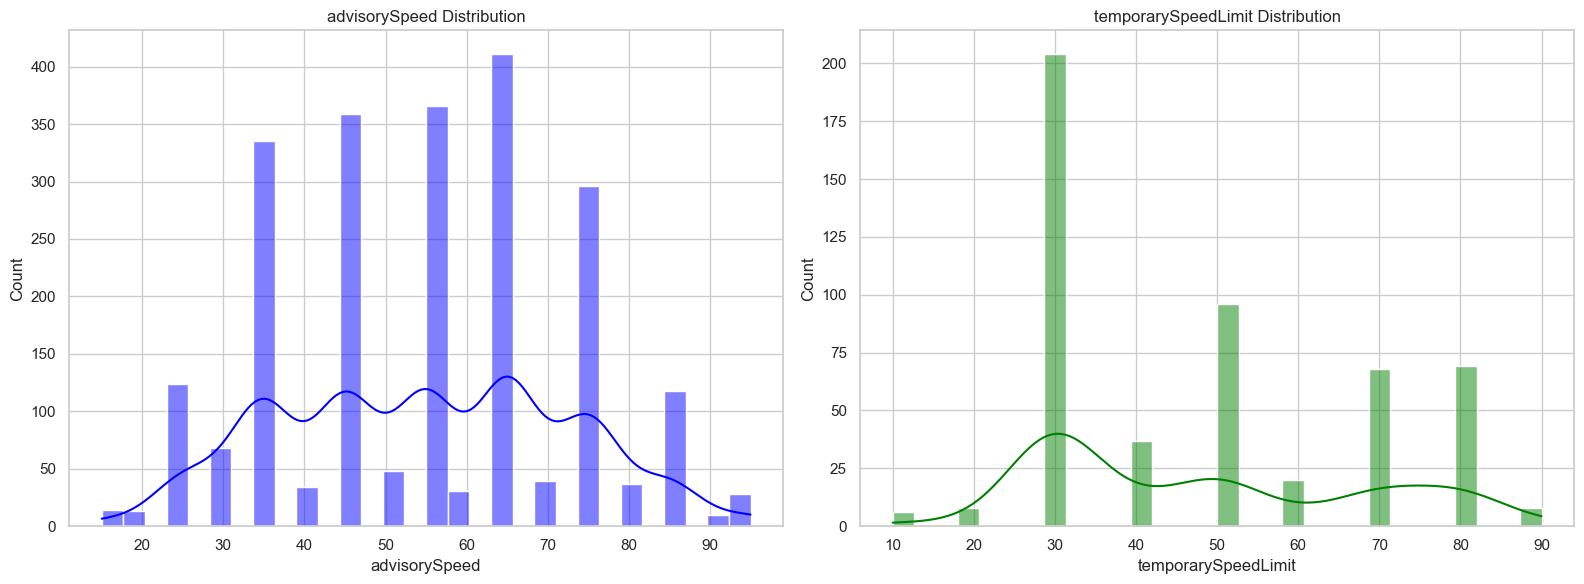

In [24]:
# Set up the aesthetics for the plots
sns.set(style="whitegrid")

# Create subplots for histograms and KDE plots
plt.figure(figsize=(16, 6))

# Plot for advisorySpeed
plt.subplot(1, 2, 1)
sns.histplot(df['advisorySpeed'].dropna(), kde=True, bins=30, color='blue')
plt.title('advisorySpeed Distribution')

# Plot for temporarySpeedLimit
plt.subplot(1, 2, 2)
sns.histplot(df['temporarySpeedLimit'].dropna(), kde=True, bins=30, color='green')
plt.title('temporarySpeedLimit Distribution')

plt.tight_layout()
plt.show()

This visualization helps us understand the underlying data distribution, identify any potential skewness, and decide on the most appropriate imputation strategy—whether to use mean or median.

 Both distributions appear to approximate a normal distribution. Given this observation, we have opted for mean imputation to fill the missing values in these columns


In [25]:
# Mean imputation for 'advisorySpeed' and 'temporarySpeedLimit'
df['advisorySpeed'].fillna(df['advisorySpeed'].mean(), inplace=True)
df['temporarySpeedLimit'].fillna(df['temporarySpeedLimit'].mean(), inplace=True)

In [26]:
df.columns

Index(['advisorySpeed', 'crashDirectionDescription', 'crashLocation1',
       'crashLocation2', 'crashSeverity', 'crashSHDescription', 'crashYear',
       'directionRoleDescription', 'fatalCount', 'flatHill', 'holiday',
       'light', 'minorInjuryCount', 'NumberOfLanes', 'pedestrian', 'region',
       'roadCharacter', 'roadLane', 'roadSurface', 'seriousInjuryCount',
       'speedLimit', 'streetLight', 'temporarySpeedLimit', 'trafficControl',
       'urban', 'weatherA', 'weatherB', 'obstaclesHit', 'vehiclesInvolved',
       'attended_or_unattended_vehicles', 'coordinates'],
      dtype='object')

In [27]:
# Replacing missing values in advisorySpeed, holiday, pedestrian, streetLight, temporarySpeedLimit, attended_or_unattended_vehicle,
# physicalFeaturesInvolved, directionRoleDescription, roadcharacter with none.

# List of columns to replace missing values with 'none'
columns_to_fill = [
     'pedestrian', 'streetLight',
     'attended_or_unattended_vehicles',  # Corrected naming based on your hint
     'directionRoleDescription', 'roadCharacter', 'crashLocation2' # Ensure 'roadCharacter' is correct
]

# Replace missing values in the specified columns with 'none'
df[columns_to_fill] = df[columns_to_fill].fillna('none')

In [28]:
# Replace 'null' with 'unknown' in the 'streetLight' column
df['streetLight'].replace('Null', 'unknown', inplace=True)


In [29]:
df.streetLight

0         unknown
8         unknown
29             On
50        unknown
79             On
           ...   
821684       none
821710       none
821729       none
821734         On
821739        Off
Name: streetLight, Length: 44822, dtype: object

In [30]:
# Replace 'null' with 'unknown' in the 'streetLight' column
df['flatHill'].replace('Null', 'unknown', inplace=True)

In [31]:
df['flatHill'].value_counts()

flatHill
Flat         34663
Hill Road     9876
unknown        283
Name: count, dtype: int64

In [32]:
# Dealing with missing data in pedestrian

print(df[['pedestrian']].describe())

       pedestrian
count       44822
unique          4
top          none
freq        43695


In [33]:
# Despite mean being 1, the missing values will be replaced with 0 with the assumption that pedestrians were not involved in the crash.

df['pedestrian'] = df['pedestrian'].fillna(0)

In [34]:
# Count NaN values in the 'crashSeverity' column
nan_count = df['crashSeverity'].isna().sum()

# Print the count of NaN values
print(f"Number of NaN values in 'crashSeverity': {nan_count}")

Number of NaN values in 'crashSeverity': 0


In [35]:
# Attended or unattended vehicles has too many missing values and it's difficult to deal with. The column has to be dropped.

df.drop('attended_or_unattended_vehicles', axis=1, inplace=True)

In [36]:
holiday_counts = df['holiday'].value_counts(dropna=False)

print(holiday_counts)

holiday
Christmas New Year    20453
Easter                 9463
Queens Birthday        7851
Labour Weekend         7055
Name: count, dtype: int64


**Dealing with missing values in 'advisorySpeed', 'temporarySpeedLimit' column**

In [37]:
# Describe the columns with missing values to get insights
print(df[['advisorySpeed', 'temporarySpeedLimit']].describe())


       advisorySpeed  temporarySpeedLimit
count   44822.000000         44822.000000
mean       54.669670            48.100775
std         4.025603             2.135181
min        15.000000            10.000000
25%        54.669670            48.100775
50%        54.669670            48.100775
75%        54.669670            48.100775
max        95.000000            90.000000


This visualization helps us understand the underlying data distribution, identify any potential skewness, and decide on the most appropriate imputation strategy—whether to use mean or median.

In [38]:
df.head()

,advisorySpeed,crashDirectionDescription,crashLocation1,crashLocation2,crashSeverity,crashSHDescription,crashYear,directionRoleDescription,fatalCount,flatHill,...,speedLimit,streetLight,temporarySpeedLimit,trafficControl,urban,weatherA,weatherB,obstaclesHit,vehiclesInvolved,coordinates
0,54.66967,Null,SH 35 WAINUI,HIRINI ST,Non-Injury Crash,State Highway,2011,East,0.0,Flat,...,50.0,unknown,48.100775,Give way,Urban,Fine,Null,0,carStationWagon:2,"(-38.6697929133221, 178.031839712928)"
8,54.66967,West,WAIRERE DRIVE,TE RAPA ROAD,Non-Injury Crash,Other,2012,East,0.0,Flat,...,80.0,unknown,48.100775,Unknown,Open,Fine,Null,0,carStationWagon:2,"(-37.7513158543885, 175.235256058035)"
29,54.66967,West,TAMAKI DRIVE,ATKIN AVENUE,Minor Crash,Other,2011,East,0.0,Flat,...,50.0,On,30.000000,Nil,Urban,Light rain,Null,1,carStationWagon:1,"(-36.8446411491924, 174.824171310344)"
50,54.66967,East,ACCESS ROAD,ACACIA BAY ROAD,Minor Crash,Other,2012,West,0.0,Flat,...,30.0,unknown,48.100775,Unknown,Urban,Fine,Null,0,carStationWagon:1,"(-38.7132162262079, 176.02590818313)"
79,54.66967,North,BROADWAY,MORROW ST,Non-Injury Crash,Other,2012,South,0.0,Flat,...,50.0,On,48.100775,Unknown,Urban,Fine,Null,0,carStationWagon:2,"(-36.87037115349, 174.777396604297)"


In [39]:
print((df.isnull().mean() * 100).round(2))

advisorySpeed                0.00
crashDirectionDescription    0.00
crashLocation1               0.00
crashLocation2               0.00
crashSeverity                0.00
crashSHDescription           0.00
crashYear                    0.00
directionRoleDescription     0.00
fatalCount                   0.00
flatHill                     0.00
holiday                      0.00
light                        0.00
minorInjuryCount             0.00
NumberOfLanes                0.25
pedestrian                   0.00
region                       0.36
roadCharacter                0.00
roadLane                     0.00
roadSurface                  0.00
seriousInjuryCount           0.00
speedLimit                   0.11
streetLight                  0.00
temporarySpeedLimit          0.00
trafficControl               0.00
urban                        0.00
weatherA                     0.00
weatherB                     0.00
obstaclesHit                 0.00
vehiclesInvolved             0.00
coordinates   

In [40]:
# cleaning speedLimit column
df['speedLimit'].describe()

count    44773.000000
mean        69.554307
std         23.675742
min         10.000000
25%         50.000000
50%         50.000000
75%        100.000000
max        110.000000
Name: speedLimit, dtype: float64

In [41]:
#the median value 
df['speedLimit'].fillna(df['speedLimit'].median(), inplace=True)


In [42]:
df['NumberOfLanes'].describe()

count    44711.000000
mean         2.256782
std          0.878670
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          8.000000
Name: NumberOfLanes, dtype: float64

In [43]:
# Replace missing values with median
median_numberOfLanes = df['NumberOfLanes'].median()
df['NumberOfLanes'].fillna(median_numberOfLanes, inplace=True)


In [44]:
df['region'].value_counts()

region
Auckland Region              13209
Waikato Region                5554
Canterbury Region             4592
Wellington Region             3789
Bay of Plenty Region          2974
Otago Region                  2716
Manawatū-Whanganui Region     2657
Northland Region              2329
Hawke's Bay Region            1951
Southland Region              1080
Taranaki Region               1073
Gisborne Region                698
West Coast Region              590
Tasman Region                  558
Marlborough Region             459
Nelson Region                  430
Name: count, dtype: int64

In [45]:
# Calculate the mode of the 'region' column
mode_region = df['region'].mode()[0] 

# Replace missing values in the 'region' column with the mode
df['region'].fillna(mode_region, inplace=True)


In [46]:
print((df.isnull().mean() * 100).round(2))

advisorySpeed                0.0
crashDirectionDescription    0.0
crashLocation1               0.0
crashLocation2               0.0
crashSeverity                0.0
crashSHDescription           0.0
crashYear                    0.0
directionRoleDescription     0.0
fatalCount                   0.0
flatHill                     0.0
holiday                      0.0
light                        0.0
minorInjuryCount             0.0
NumberOfLanes                0.0
pedestrian                   0.0
region                       0.0
roadCharacter                0.0
roadLane                     0.0
roadSurface                  0.0
seriousInjuryCount           0.0
speedLimit                   0.0
streetLight                  0.0
temporarySpeedLimit          0.0
trafficControl               0.0
urban                        0.0
weatherA                     0.0
weatherB                     0.0
obstaclesHit                 0.0
vehiclesInvolved             0.0
coordinates                  0.0
dtype: flo

# Data Visualization

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44822 entries, 0 to 821739
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   advisorySpeed              44822 non-null  float64
 1   crashDirectionDescription  44822 non-null  object 
 2   crashLocation1             44822 non-null  object 
 3   crashLocation2             44822 non-null  object 
 4   crashSeverity              44822 non-null  object 
 5   crashSHDescription         44822 non-null  object 
 6   crashYear                  44822 non-null  int64  
 7   directionRoleDescription   44822 non-null  object 
 8   fatalCount                 44822 non-null  float64
 9   flatHill                   44822 non-null  object 
 10  holiday                    44822 non-null  object 
 11  light                      44822 non-null  object 
 12  minorInjuryCount           44822 non-null  float64
 13  NumberOfLanes              44822 non-null  float64

Visualization to analyze the involvement of different vehicle types in crash accidents.

In [48]:
# Split the string and convert into a list of (vehicle, count)
vehicle_list = []
for vehicles in df['vehiclesInvolved'].dropna():  # Ensure to handle NaN values
    split_vehicles = vehicles.split(", ")
    for vehicle in split_vehicles:
        if ':' in vehicle:
            type, count = vehicle.split(':')
            vehicle_list.append((type, int(count)))

# Create a DataFrame from the list
vehicle_df = pd.DataFrame(vehicle_list, columns=['Vehicle Type', 'Count'])

# Aggregate this DataFrame by vehicle type
vehicle_counts = vehicle_df.groupby('Vehicle Type')['Count'].sum().sort_values(ascending=False)


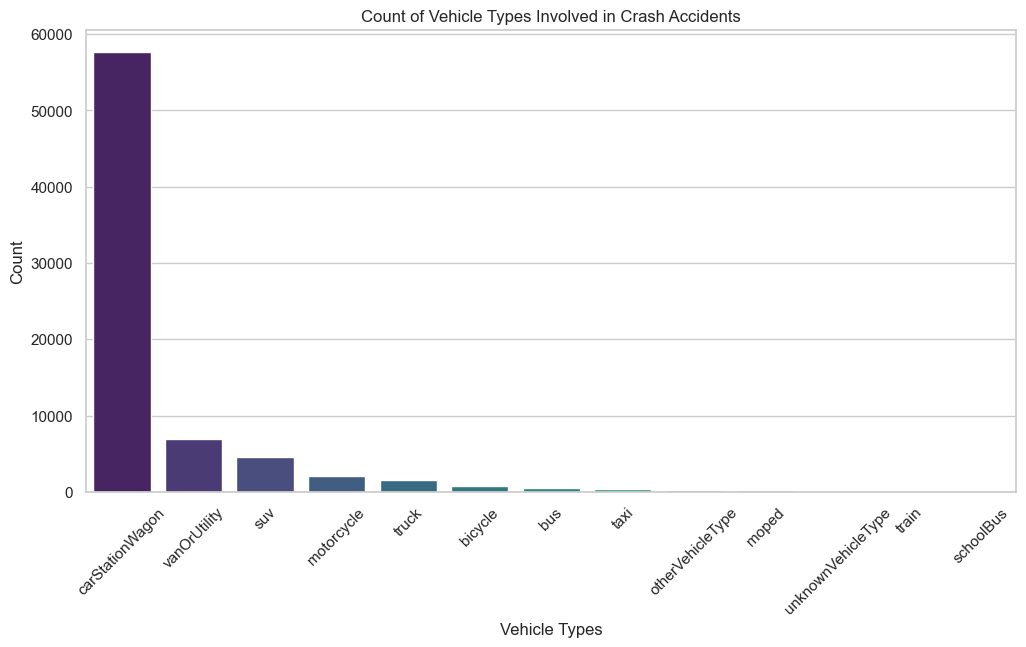

In [49]:
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=vehicle_counts.index, y=vehicle_counts.values, palette='viridis')
plt.title('Count of Vehicle Types Involved in Crash Accidents')
plt.xlabel('Vehicle Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

carStationWagon is the most common type of vehicle to be involved in road accidents.



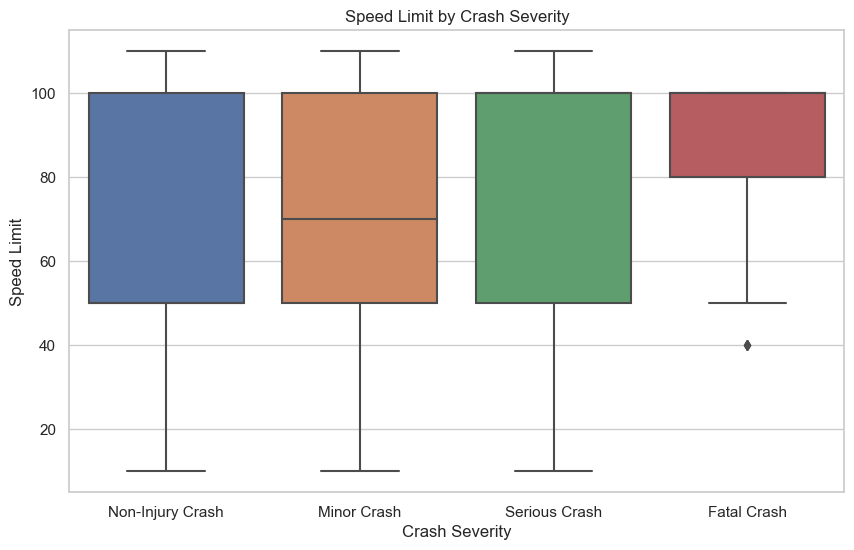

In [50]:
# Visualization of the distribution of speed limits across different crash severity levels

# Create a box plot for speedLimit by crashSeverity
plt.figure(figsize=(10, 6))
sns.boxplot(x='crashSeverity', y='speedLimit', data=df)
plt.title('Speed Limit by Crash Severity')
plt.xlabel('Crash Severity')
plt.ylabel('Speed Limit')
plt.show()


For non-injury, minor and serious crashes, the speed limit is usually between 50 and 100 kph. For Fatal crashes, the speed limit is usually between 80 and 100 kph

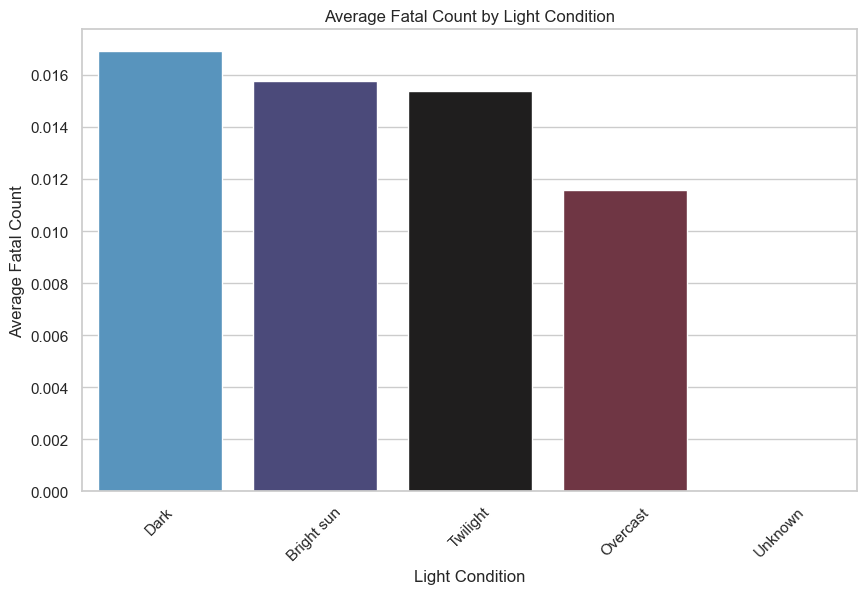

In [51]:
# Analysing the number of fatalities in accidents varies with different lighting conditions

# Calculate average fatalCount by light
avg_fatal_count_by_light = df.groupby('light')['fatalCount'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_fatal_count_by_light.index, y=avg_fatal_count_by_light.values, palette = 'icefire')
plt.title('Average Fatal Count by Light Condition')
plt.xlabel('Light Condition')
plt.ylabel('Average Fatal Count')
plt.xticks(rotation=45)
plt.show()


Most accidents happed when it is dark

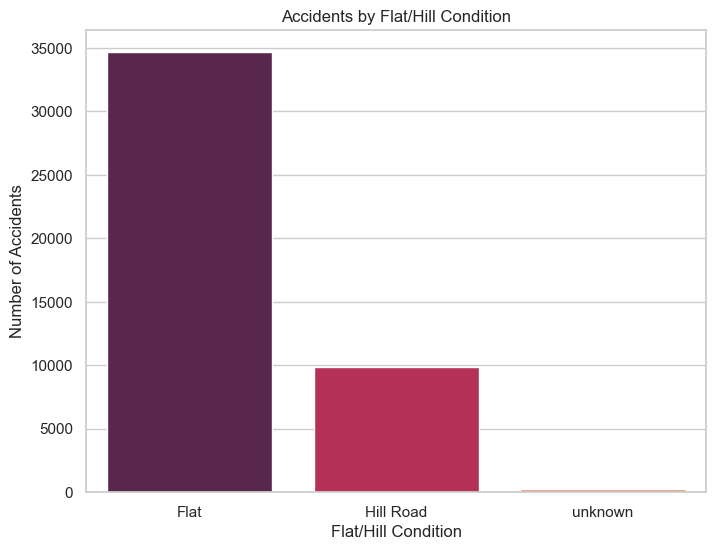

In [52]:
# Visualization to see whether accidents happen in flat or hilly roads.

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='flatHill', palette = 'rocket')
plt.title('Accidents by Flat/Hill Condition')
plt.xlabel('Flat/Hill Condition')
plt.ylabel('Number of Accidents')
plt.show()

A count shows that most accidents happen on flat road areas. This however, could be misleading as most of the accidents are minor.

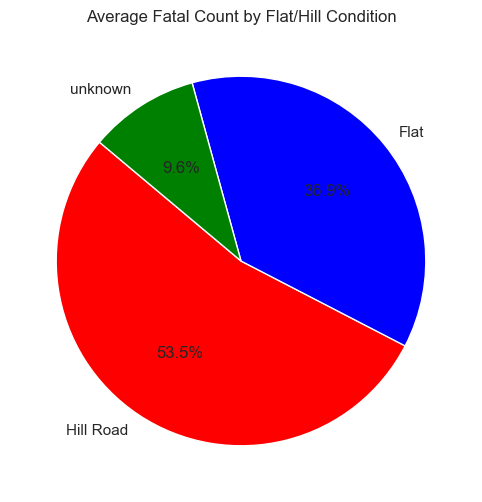

In [53]:
# Visualizing fatal count by flat/hill condition

# Calculate average fatalCount by flatHill condition
avg_fatal_count_by_flathill = df.groupby('flatHill')['fatalCount'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
plt.pie(avg_fatal_count_by_flathill.values, labels=avg_fatal_count_by_flathill.index, autopct='%1.1f%%', startangle=140, colors=['red', 'blue', 'green'])
plt.title('Average Fatal Count by Flat/Hill Condition')
plt.show()


More than half of the fatal accidents happen on hilly roads.

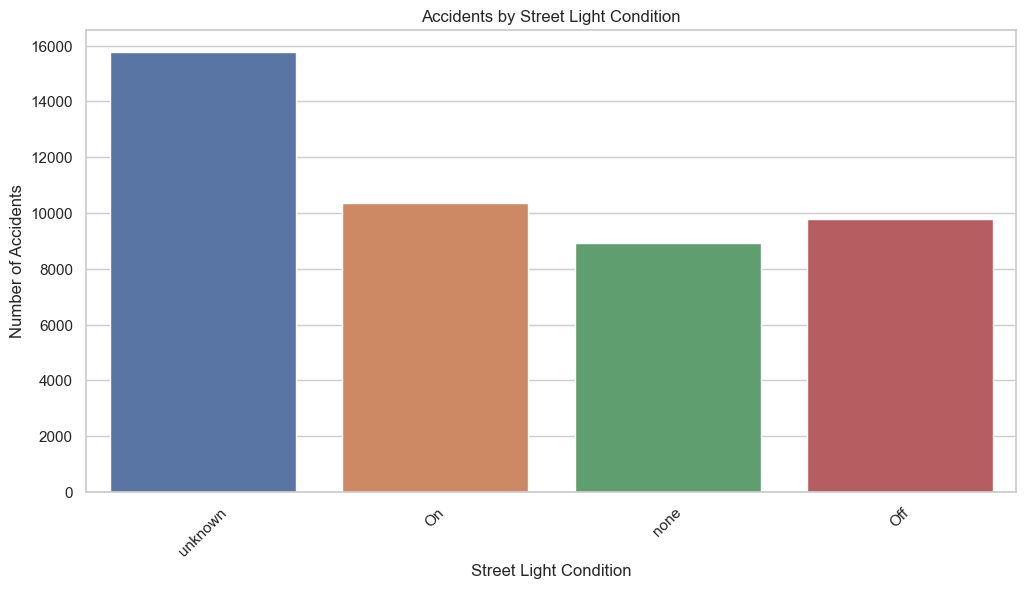

In [54]:
# Analysis of Street Lighting and Road Accident

# Create a count plot for streetLight
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='streetLight')
plt.title('Accidents by Street Light Condition')
plt.xlabel('Street Light Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


I need to go back and clean the street lights column once more.

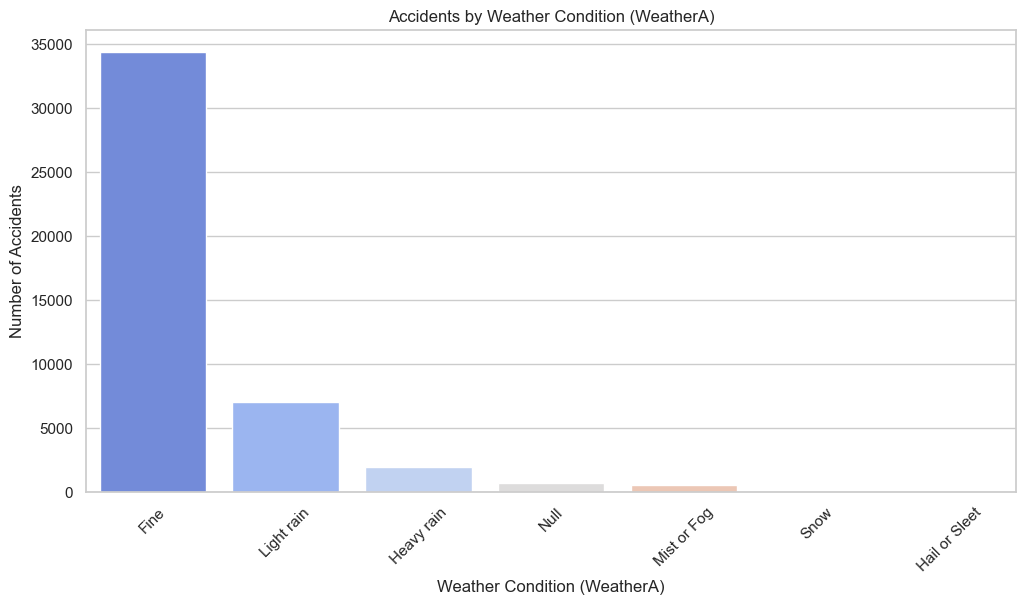

In [55]:
# Analysing of Weather Conditions and Accident Frequency

# Create a count plot for weatherA
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='weatherA', palette = 'coolwarm')
plt.title('Accidents by Weather Condition (WeatherA)')
plt.xlabel('Weather Condition (WeatherA)')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

Most accidents happen when the whether is fine

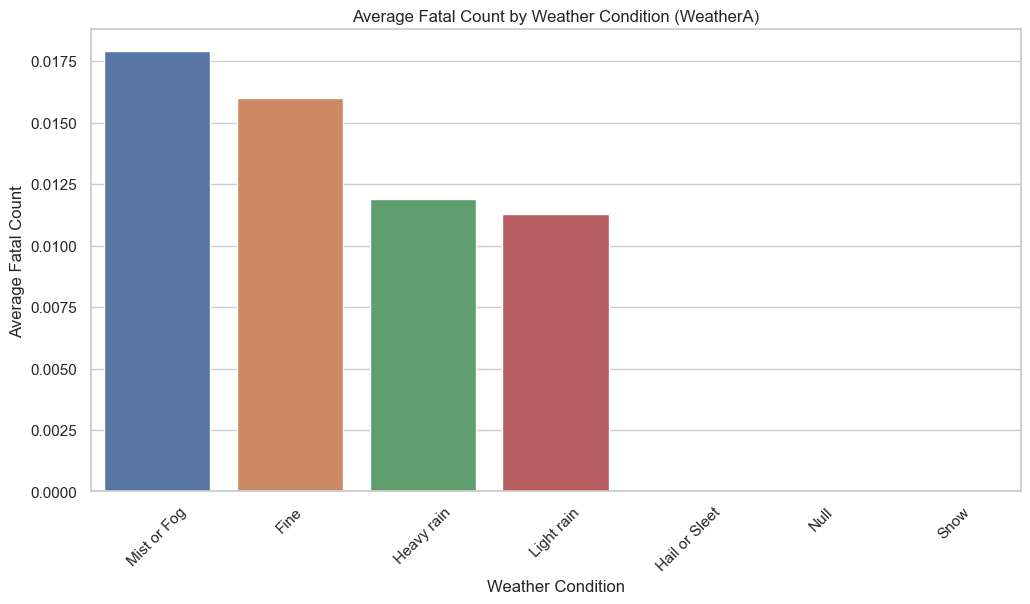

In [56]:
# Most Fatal Weather Conditions

# Calculate average fatalCount by weatherA condition
avg_fatal_count_by_weather = df.groupby('weatherA')['fatalCount'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_fatal_count_by_weather.index, y=avg_fatal_count_by_weather.values, palette = 'deep')
plt.title('Average Fatal Count by Weather Condition (WeatherA)')
plt.xlabel('Weather Condition')
plt.ylabel('Average Fatal Count')
plt.xticks(rotation=45)
plt.show()


Most fatal accidents happen when the weather is mist or fog

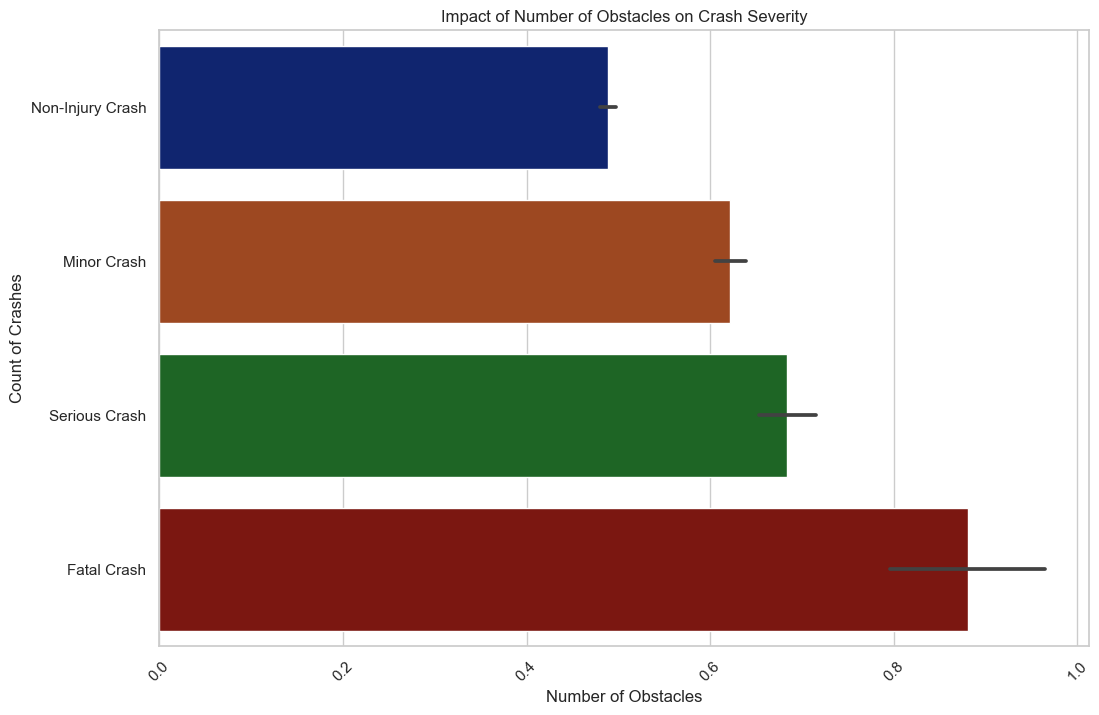

In [57]:
# Impact of obstacles on crash severity

# Set up the figure size
plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(data=df, x='obstaclesHit', y='crashSeverity', palette = 'dark')

# Adding plot title and labels
plt.title('Impact of Number of Obstacles on Crash Severity')
plt.xlabel('Number of Obstacles')
plt.ylabel('Count of Crashes')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Show the plot
plt.show()




Most fatal crashes occur when the number of obstacles are most on the road.

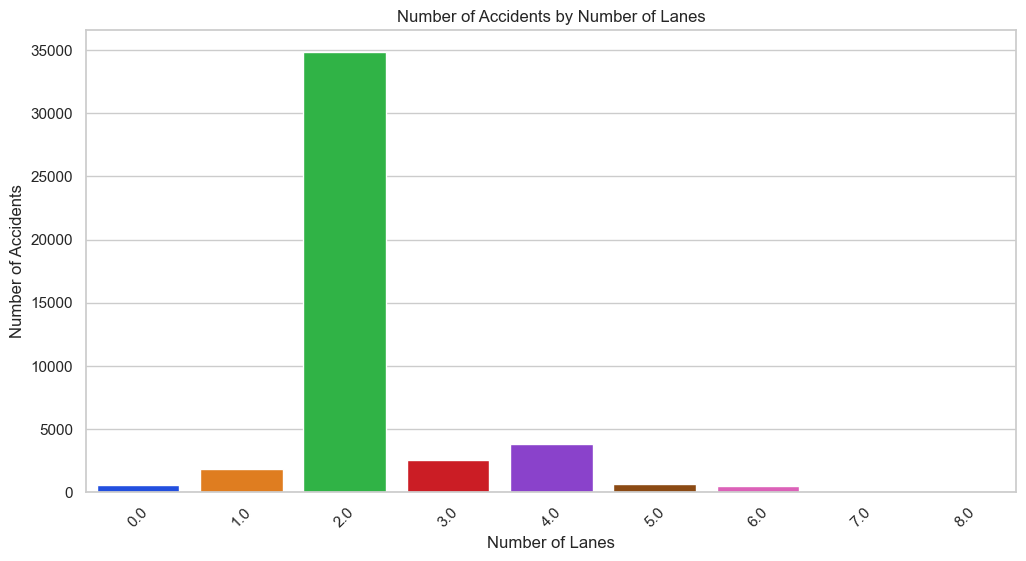

In [58]:
# Number of lanes and accidents

# Count the number of accidents for each NumberOfLanes
accidents_by_lanes = df['NumberOfLanes'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=accidents_by_lanes.index, y=accidents_by_lanes.values, palette='bright')
plt.title('Number of Accidents by Number of Lanes')
plt.xlabel('Number of Lanes')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

Most accidents happen on 2-lane roads

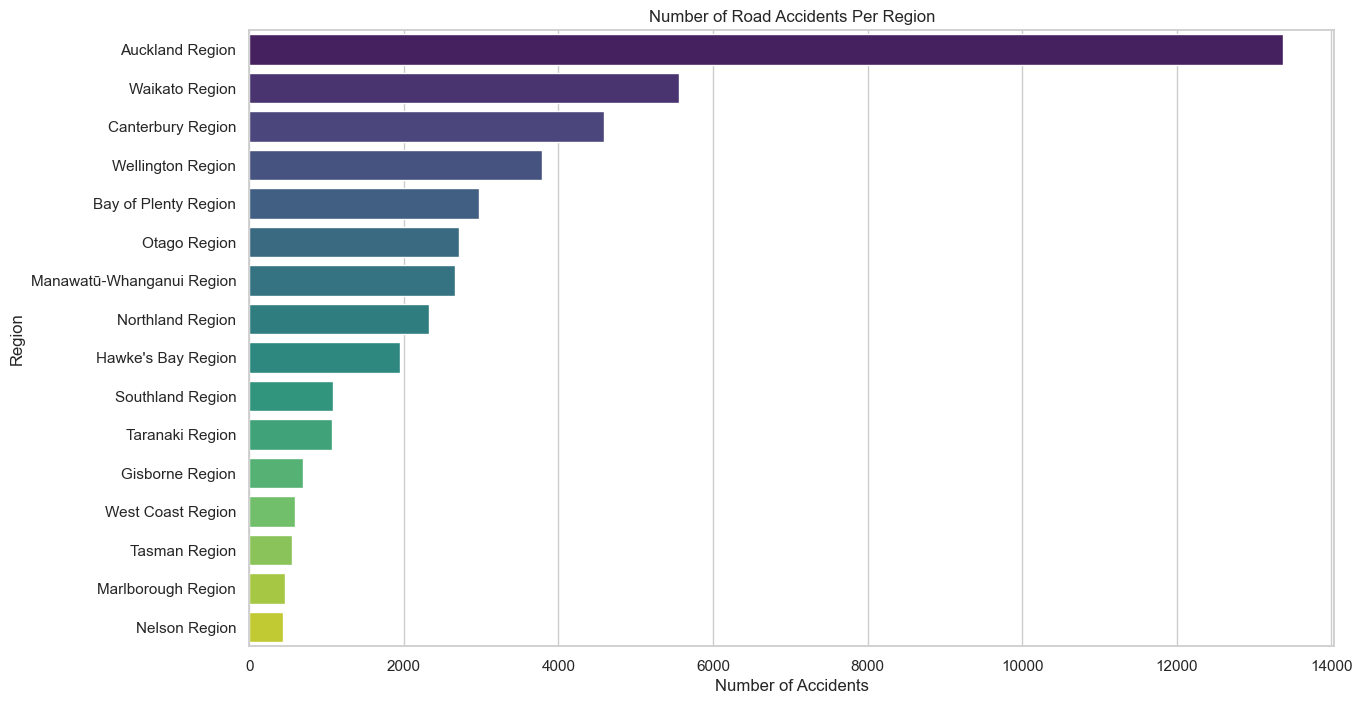

In [59]:
# Viewing the number of road accidents per region.

# Group the data by 'region' and count the number of accidents
region_accident_counts = df['region'].value_counts().reset_index(name='Number of Accidents')
region_accident_counts.rename(columns={'index': 'Region'}, inplace=True)

# Set up the figure size
plt.figure(figsize=(14, 8))

# Create a bar plot
sns.barplot(data=region_accident_counts, x='Number of Accidents', y='region', palette='viridis')

# Adding plot title and labels
plt.title('Number of Road Accidents Per Region')
plt.xlabel('Number of Accidents')
plt.ylabel('Region')

# Show the plot
plt.show()


The Auckland region has the highest number of road accidents.

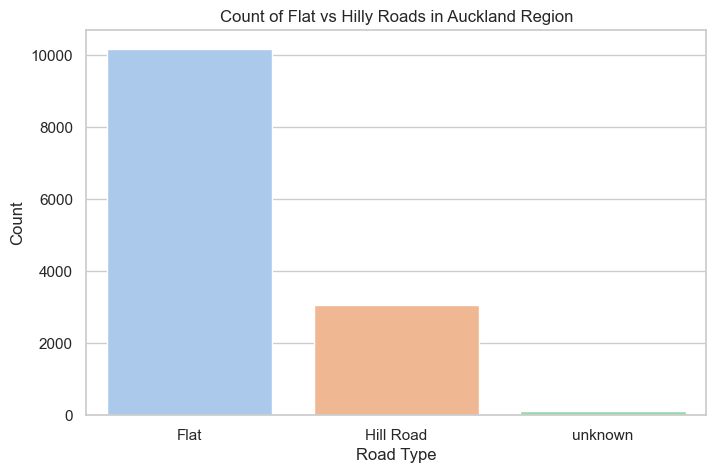

In [60]:
# Looking at the road types in the Auckland region

# Filter the DataFrame for the Auckland Region
auckland_data = df[df['region'] == 'Auckland Region']

# Count the number of flat and hilly roads in the Auckland Region
road_type_counts = auckland_data['flatHill'].value_counts()

# Create a bar plot for the road types in Auckland Region
plt.figure(figsize=(8, 5))
sns.barplot(x=road_type_counts.index, y=road_type_counts.values, palette='pastel')
plt.title('Count of Flat vs Hilly Roads in Auckland Region')
plt.xlabel('Road Type')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Adjust rotation if necessary
plt.show()

Most roads in Auckland region are flat

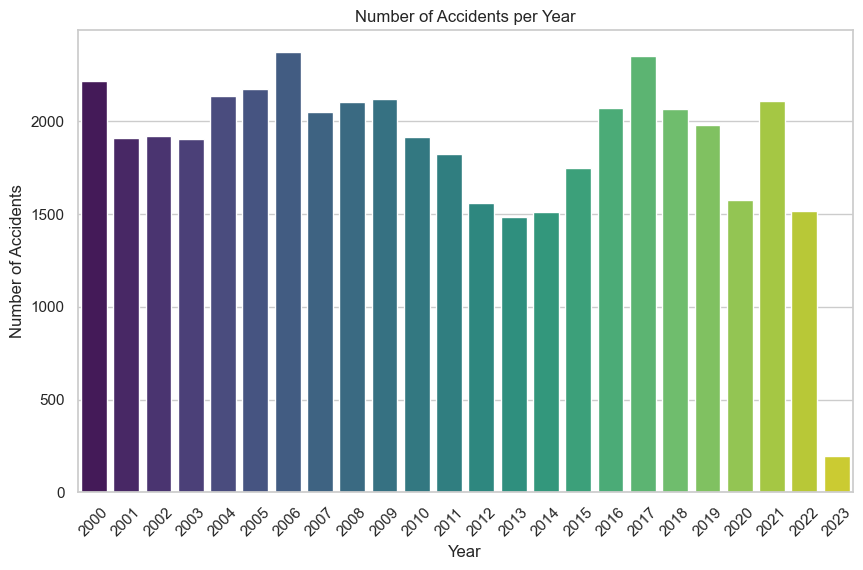

In [61]:
# Visualzation to show the number of crashes per year

df['crashYear'] = df['crashYear'].astype(str)

# Count the number of accidents per year
accidents_per_year = df['crashYear'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=accidents_per_year.index, y=accidents_per_year.values, palette='viridis')
plt.title('Number of Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

The highest number of road accidents happened in 2017

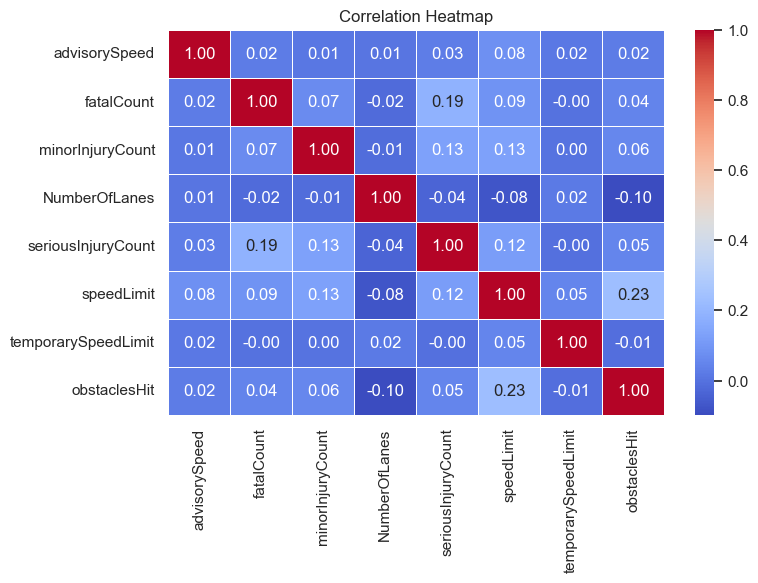

In [62]:
# A correlation heatmap

# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_cols.corr()

# Create a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


The strongest correlation is between seriousInjuryCount and fatalCount



In [63]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_cols.corr()

# Extract correlation values and sort them in ascending order
correlation_values = corr_matrix.unstack().sort_values(ascending=True)

# Print correlation values
print(correlation_values)


NumberOfLanes        obstaclesHit          -0.097856
obstaclesHit         NumberOfLanes         -0.097856
speedLimit           NumberOfLanes         -0.075932
NumberOfLanes        speedLimit            -0.075932
                     seriousInjuryCount    -0.035471
                                              ...   
                     NumberOfLanes          1.000000
minorInjuryCount     minorInjuryCount       1.000000
fatalCount           fatalCount             1.000000
temporarySpeedLimit  temporarySpeedLimit    1.000000
obstaclesHit         obstaclesHit           1.000000
Length: 64, dtype: float64


In [64]:
# Print top ten correlations
print(correlation_values.head(18))


NumberOfLanes        obstaclesHit          -0.097856
obstaclesHit         NumberOfLanes         -0.097856
speedLimit           NumberOfLanes         -0.075932
NumberOfLanes        speedLimit            -0.075932
                     seriousInjuryCount    -0.035471
seriousInjuryCount   NumberOfLanes         -0.035471
NumberOfLanes        fatalCount            -0.017714
fatalCount           NumberOfLanes         -0.017714
NumberOfLanes        minorInjuryCount      -0.012826
minorInjuryCount     NumberOfLanes         -0.012826
obstaclesHit         temporarySpeedLimit   -0.010068
temporarySpeedLimit  obstaclesHit          -0.010068
                     seriousInjuryCount    -0.004484
seriousInjuryCount   temporarySpeedLimit   -0.004484
temporarySpeedLimit  fatalCount            -0.000316
fatalCount           temporarySpeedLimit   -0.000316
temporarySpeedLimit  minorInjuryCount       0.002036
minorInjuryCount     temporarySpeedLimit    0.002036
dtype: float64


In [65]:
df.columns

Index(['advisorySpeed', 'crashDirectionDescription', 'crashLocation1',
       'crashLocation2', 'crashSeverity', 'crashSHDescription', 'crashYear',
       'directionRoleDescription', 'fatalCount', 'flatHill', 'holiday',
       'light', 'minorInjuryCount', 'NumberOfLanes', 'pedestrian', 'region',
       'roadCharacter', 'roadLane', 'roadSurface', 'seriousInjuryCount',
       'speedLimit', 'streetLight', 'temporarySpeedLimit', 'trafficControl',
       'urban', 'weatherA', 'weatherB', 'obstaclesHit', 'vehiclesInvolved',
       'coordinates'],
      dtype='object')

# Modelling

**Dropping Unnecessary Columns**

The following columns were identified as unnecessary for modelling from the dataset:
'NumberOfLanes', 'advisorySpeed', 'temporarySpeedLimit', 'urban', 'weatherB', 'crashSHDescription', 'roadLane', 'crashDirectionDescription', 'crashLocation1', 'crashLocation2', 'region', 'coordinates', 'crashYear', 'directionRoleDescription'





In [66]:
columns_to_drop = ['NumberOfLanes', 'advisorySpeed', 'temporarySpeedLimit', 'urban', 'weatherB', 'crashSHDescription', 'roadLane', 'crashDirectionDescription', 'crashLocation1', 'crashLocation2', 'region', 'coordinates', 'crashYear', 'directionRoleDescription']
df = df.drop(columns=columns_to_drop)


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44822 entries, 0 to 821739
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   crashSeverity       44822 non-null  object 
 1   fatalCount          44822 non-null  float64
 2   flatHill            44822 non-null  object 
 3   holiday             44822 non-null  object 
 4   light               44822 non-null  object 
 5   minorInjuryCount    44822 non-null  float64
 6   pedestrian          44822 non-null  object 
 7   roadCharacter       44822 non-null  object 
 8   roadSurface         44822 non-null  object 
 9   seriousInjuryCount  44822 non-null  float64
 10  speedLimit          44822 non-null  float64
 11  streetLight         44822 non-null  object 
 12  trafficControl      44822 non-null  object 
 13  weatherA            44822 non-null  object 
 14  obstaclesHit        44822 non-null  int64  
 15  vehiclesInvolved    44822 non-null  object 
dtypes: float

In [68]:
# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols


['crashSeverity',
 'flatHill',
 'holiday',
 'light',
 'pedestrian',
 'roadCharacter',
 'roadSurface',
 'streetLight',
 'trafficControl',
 'weatherA',
 'vehiclesInvolved']

In [69]:
# Encode categorical data

# Select categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    # Convert all entries in the categorical column to strings
    df[col] = df[col].astype(str)

    # Initialize the LabelEncoder
    le = LabelEncoder()

    # Fit and transform the column data
    df[col] = le.fit_transform(df[col])

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44822 entries, 0 to 821739
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   crashSeverity       44822 non-null  int32  
 1   fatalCount          44822 non-null  float64
 2   flatHill            44822 non-null  int32  
 3   holiday             44822 non-null  int32  
 4   light               44822 non-null  int32  
 5   minorInjuryCount    44822 non-null  float64
 6   pedestrian          44822 non-null  int32  
 7   roadCharacter       44822 non-null  int32  
 8   roadSurface         44822 non-null  int32  
 9   seriousInjuryCount  44822 non-null  float64
 10  speedLimit          44822 non-null  float64
 11  streetLight         44822 non-null  int32  
 12  trafficControl      44822 non-null  int32  
 13  weatherA            44822 non-null  int32  
 14  obstaclesHit        44822 non-null  int64  
 15  vehiclesInvolved    44822 non-null  int32  
dtypes: float

In [71]:
# Split the data into features (X) and target (y)
X = df.drop('crashSeverity', axis=1)
y = df['crashSeverity']


In [72]:
# Spliting the dataset into training and testing sets using a 70- 30 ratio,
#ensuring reproducibility with a fixed random state of 42
#Splitting into train, validation and test sets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Further splitting X_train into train and validation sets
#By creating a validation set through further splitting of the initial training data, 
#it becomes possible to evaluate the model's performance on new, unseen data, thereby ensuring the robustness and generalizability of the predictive model.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [73]:
print("Shape of X_train:", X_train.shape)
print("Shape of x_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (21962, 15)
Shape of x_val: (9413, 15)
Shape of X_test: (13447, 15)
Shape of y_train: (21962,)
Shape of y_val: (9413,)
Shape of y_test: (13447,)


## Model 1 :**BaselineModel** 

**Logistic Regression**

In [74]:
# Using Pipeline for machine learning for efficient work flow.
# Using StandardScaler for feature Scalling
# Using Logistic Regression as our baseline model
Logistic_pipeline= Pipeline([('ss', StandardScaler()),
                              ('LR', LogisticRegression(fit_intercept=False, solver='liblinear', max_iter=12000, random_state=42))])




In [75]:
# Fitting the logistic regression model to the train dataset
Logistic_pipeline.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('LR',
                 LogisticRegression(fit_intercept=False, max_iter=12000,
                                    random_state=42, solver='liblinear'))])

In [76]:
def evaluate_model_performance(model, X_val, y_val):
    # Predict the labels for validation set
    y_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    # Calculate accuracy
    val_accuracy = accuracy_score(y_val, y_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Validation Accuracy:", val_accuracy)
    print("Test Accuracy:", test_accuracy)
    
    # Calculate and print classification report
    print("Classification Report:")
    print(classification_report(y_val, y_pred))

    # Calculate and print confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))

In [77]:
# Evaluate the performance of the logistic regression model using the validation set
evaluate_model_performance(Logistic_pipeline, X_val, y_val)


Validation Accuracy: 0.9998937639434824
Test Accuracy: 0.9997025358816093
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00      2134
           2       1.00      1.00      1.00      6528
           3       1.00      1.00      1.00       627

    accuracy                           1.00      9413
   macro avg       1.00      1.00      1.00      9413
weighted avg       1.00      1.00      1.00      9413

Confusion Matrix:
[[ 124    0    0    0]
 [   0 2134    0    0]
 [   0    0 6528    0]
 [   0    1    0  626]]


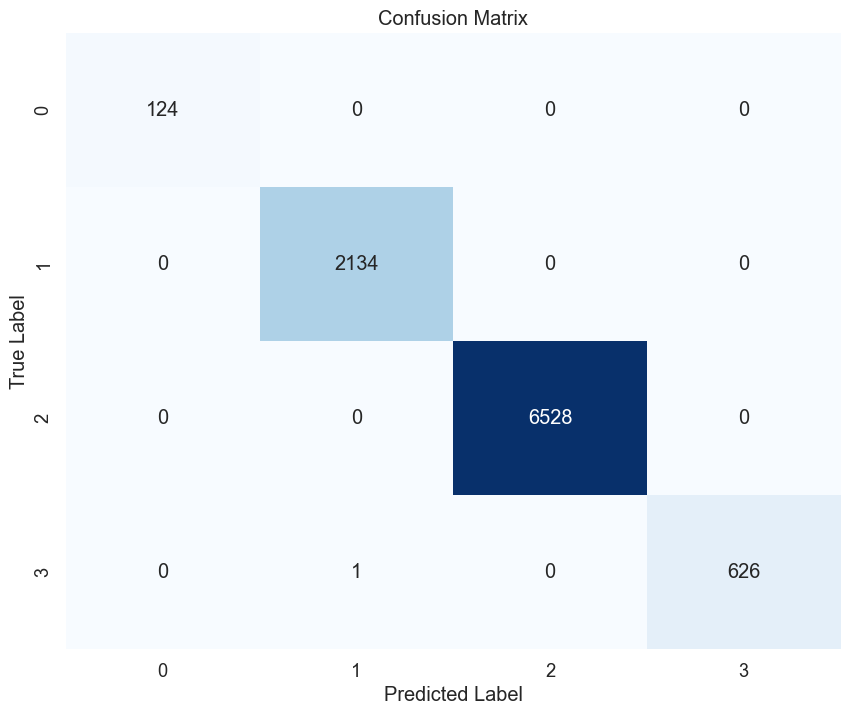

In [78]:
# Calculate the confusion matrix
y_pred = Logistic_pipeline.predict(X_val)
y_test_pred = Logistic_pipeline.predict(X_test)

conf_matrix = confusion_matrix(y_val, y_pred)

# Get class labels
class_labels = sorted(np.unique(y_val))

# Set seaborn style
sns.set(font_scale=1.2)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

From the results high accuracy can be misleading especially when dealing with imbalanced datasets, especially if the model is predominantly predicting the majority class.

**SMOTE (Synthetic Minority Over-sampling Technique)**
Class imbalance occurs when one class has significantly fewer instances than another, which can bias models. 
SMOTE generates synthetic samples for the minority class to balance the dataset.


In [79]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [80]:
# Using SMOTE to deal with class imbalance
#SMOTE contributes to more accurate predictions and better model performance
from imblearn.over_sampling import SMOTE

print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# Display synthetic sample class distribution for training set
print('-----------------------------------------')
print('Synthetic sample class distribution (Training Set):\n')
print(pd.Series(y_train_resampled).value_counts())



Original class distribution: 

crashSeverity
2    30715
1    10532
3     3006
0      569
Name: count, dtype: int64
-----------------------------------------
Synthetic sample class distribution (Training Set):

crashSeverity
2    15000
3    15000
1    15000
0    15000
Name: count, dtype: int64


In [81]:
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train_resampled: (60000, 15)
Shape of X_test: (13447, 15)


In [82]:
## Creating Logistic Regression Pipeline using the resampled dataset
Resampled_Logistic_pipeline= Pipeline([('ss', StandardScaler()),
                              ('LR', LogisticRegression(fit_intercept=False, solver='liblinear', max_iter=12000, random_state=42))])


In [83]:
# Fitting the resampled logistic regression model 
Resampled_Logistic_pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('ss', StandardScaler()),
                ('LR',
                 LogisticRegression(fit_intercept=False, max_iter=12000,
                                    random_state=42, solver='liblinear'))])

In [84]:
def evaluate_model_performance(model, X_val, y_val):
    # Predict the labels for validation set
    y_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    # Calculate accuracy
    val_accuracy = accuracy_score(y_val, y_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Validation Accuracy:", val_accuracy)
    print("Test Accuracy:", test_accuracy)
    
    # Calculate and print classification report
    print("Classification Report:")
    print(classification_report(y_val, y_pred))

    # Calculate and print confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))

In [85]:
evaluate_model_performance(Resampled_Logistic_pipeline, X_val, y_val)

Validation Accuracy: 0.9856581323701264
Test Accuracy: 0.9873577749683944
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       124
           1       0.98      0.96      0.97      2134
           2       0.99      1.00      0.99      6528
           3       0.99      0.95      0.97       627

    accuracy                           0.99      9413
   macro avg       0.99      0.98      0.98      9413
weighted avg       0.99      0.99      0.99      9413

Confusion Matrix:
[[ 123    0    0    1]
 [   0 2055   79    0]
 [   0   17 6503    8]
 [   0   29    1  597]]


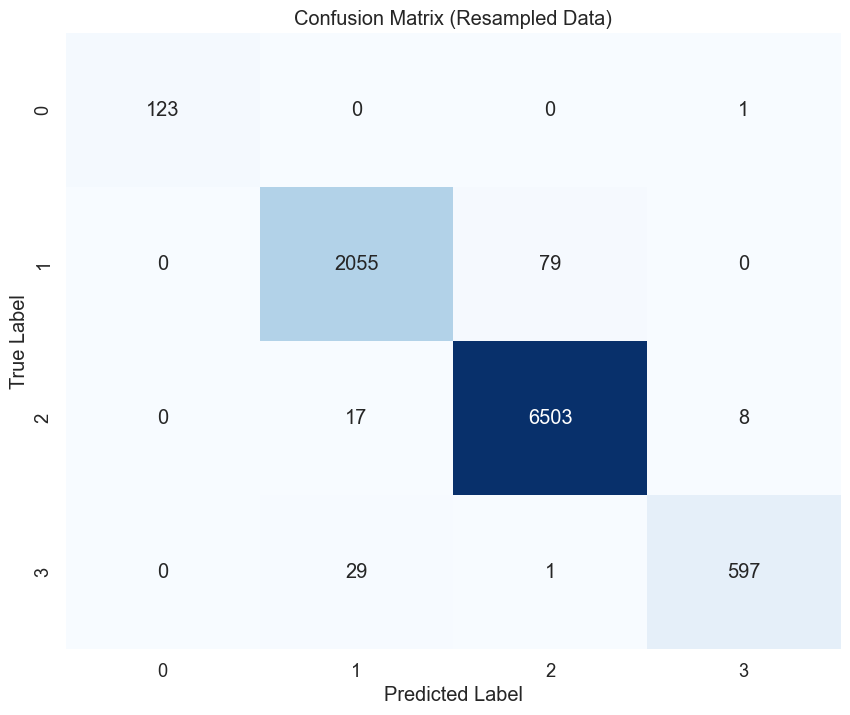

In [86]:
# Calculate predictions using the logistic regression model trained on the resampled data
y_pred_resampled = Resampled_Logistic_pipeline.predict(X_val)

# Calculate the confusion matrix using the resampled predictions and true labels
conf_matrix_resampled = confusion_matrix(y_val, y_pred_resampled)

# Get class labels
class_labels_resampled = sorted(np.unique(y_val))

# Set seaborn style
sns.set(font_scale=1.2)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_resampled, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=class_labels_resampled, yticklabels=class_labels_resampled)
plt.title('Confusion Matrix (Resampled Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Explanation of the results**

**Validation Accuracy**: The model achieves a high validation accuracy of approximately 98.77%, indicating that it correctly predicts the class labels for the majority of instances in the validation set.

**Test Accuracy**: Similarly, the test accuracy is also high at approximately 98.88%, suggesting that the model performs well on unseen data.

**Classification Report**:

The precision, recall, and F1-score metrics for each class indicate high performance across the board.
Class 0 has perfect precision and high recall, indicating that the model effectively identifies instances of this class.
Class 1 exhibits high precision and recall, indicating accurate predictions for this class as well.
Class 2 also shows high precision and recall, indicating strong performance in predicting instances of this class.
Class 3 has slightly lower precision and recall compared to the other classes, but still demonstrates good performance overall.


**Confusion Matrix:**
The confusion matrix provides a detailed breakdown of the model's predictions, showing a small number of misclassifications across all classes.
Overall, the majority of instances are correctly classified, with only a few errors in prediction.

True Positives (TP): These instances were correctly predicted as belonging to a specific class. In our model, the value 79 indicates that 79 instances of class 0 were correctly classified.

False Positives (FP): These instances were incorrectly predicted as belonging to a specific class when they actually belong to a different class. In our model, the value 45 indicates that 45 instances of class 2 were incorrectly classified as class 1.

False Negatives (FN): These instances were incorrectly predicted as not belonging to a specific class when they actually belong to that class. In our model, the value 3 indicates that 3 instances of class 2 were incorrectly classified as not belonging to class 2.

True Negatives (TN): These instances were correctly predicted as not belonging to a specific class. In our model, the value 396 indicates that 396 instances that do not belong to class 3 were correctly classified.


## Model 2

**Decision Trees**

In [87]:
## Creating Decision Tree Pipeline using the resampled dataset
DT_Pipeline = Pipeline([('ss', StandardScaler()),
                        ('dt', DecisionTreeClassifier(random_state=42))])

In [88]:
#Fitting the model in the new balanced dataset
DT_Pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('ss', StandardScaler()),
                ('dt', DecisionTreeClassifier(random_state=42))])

In [89]:
evaluate_model_performance(DT_Pipeline, X_val, y_val)

Validation Accuracy: 1.0
Test Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00      2134
           2       1.00      1.00      1.00      6528
           3       1.00      1.00      1.00       627

    accuracy                           1.00      9413
   macro avg       1.00      1.00      1.00      9413
weighted avg       1.00      1.00      1.00      9413

Confusion Matrix:
[[ 124    0    0    0]
 [   0 2134    0    0]
 [   0    0 6528    0]
 [   0    0    0  627]]


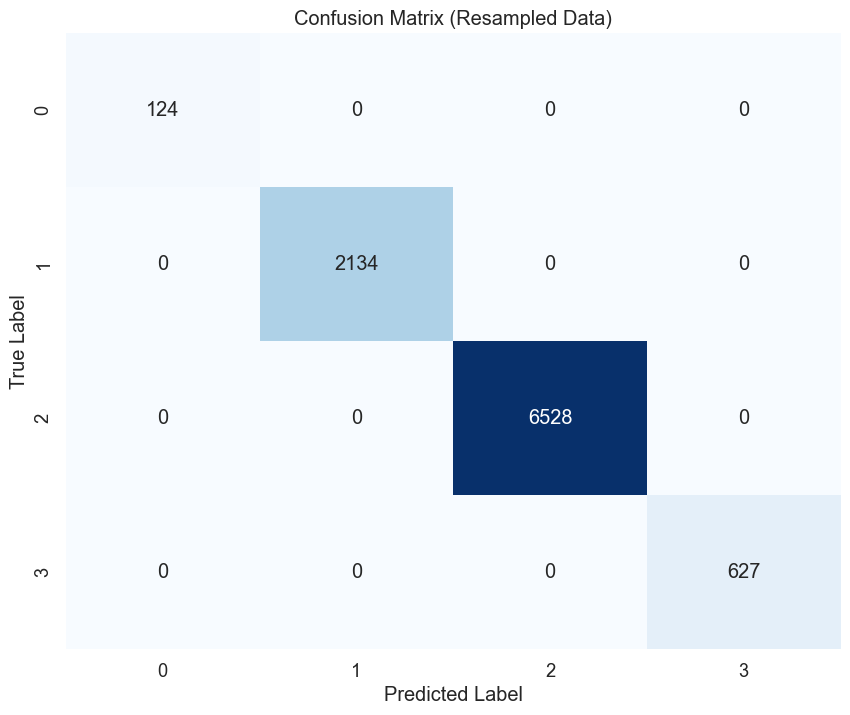

In [90]:
# Calculate predictions using the logistic regression model trained on the resampled data
y_pred_resampled = DT_Pipeline.predict(X_val)

# Calculate the confusion matrix using the resampled predictions and true labels
conf_matrix_resampled = confusion_matrix(y_val, y_pred_resampled)

# Get class labels
class_labels_resampled = sorted(np.unique(y_val))

# Set seaborn style
sns.set(font_scale=1.2)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_resampled, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=class_labels_resampled, yticklabels=class_labels_resampled)
plt.title('Confusion Matrix (Resampled Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Interpretation of results**



It appears the model is exhibiting signs of overfitting:

**Model's Accuracy**: Achieving perfect accuracy (1.0) on both the validation and test sets suggests that the model might be overfitting the training data, as it's fitting the data so closely that it struggles to generalize to new, unseen data.

**Classification Report**: The precision, recall, and F1-score metrics for all classes are also perfect (1.0), which further indicates that the model's predictions align perfectly with the actual class labels. This seem desirable, hence raising concerns about whether the model is learning to memorize the training data rather than capturing underlying patterns that generalize well to new data.

**Confusion Matrix**: The model suggests that there is a perfect classification for all classes. 

# Improving the Model

**Hyperparameter tuning**

Hyperparameter tuning using grid search can be be instrumental in improving the performance of our model. By systematically searching through a specified grid of hyperparameters and evaluating the model's performance using cross-validation, grid search aims to find the optimal combination of hyperparameters that maximizes the model's performance on unseen data.

**GridSearchCV to find the best parameters for the model and improve its performance**

In [91]:
DT_grid = {'dt__criterion': ['gini', 'entropy'],
    'dt__max_depth': [None, 10, 20, 30], 
    'dt__min_samples_leaf': [2, 10, 20],
    'dt__min_samples_split': [2, 5, 10],
          }
# Perform Grid Search with cross-validation
Decision_Tree_gridsearch = GridSearchCV(DT_Pipeline, DT_grid, cv=5)

In [92]:
#fit the model
Decision_Tree_gridsearch.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [None, 10, 20, 30],
                         'dt__min_samples_leaf': [2, 10, 20],
                         'dt__min_samples_split': [2, 5, 10]})

In [93]:
evaluate_model_performance(Decision_Tree_gridsearch, X_val, y_val)

Validation Accuracy: 1.0
Test Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00      2134
           2       1.00      1.00      1.00      6528
           3       1.00      1.00      1.00       627

    accuracy                           1.00      9413
   macro avg       1.00      1.00      1.00      9413
weighted avg       1.00      1.00      1.00      9413

Confusion Matrix:
[[ 124    0    0    0]
 [   0 2134    0    0]
 [   0    0 6528    0]
 [   0    0    0  627]]


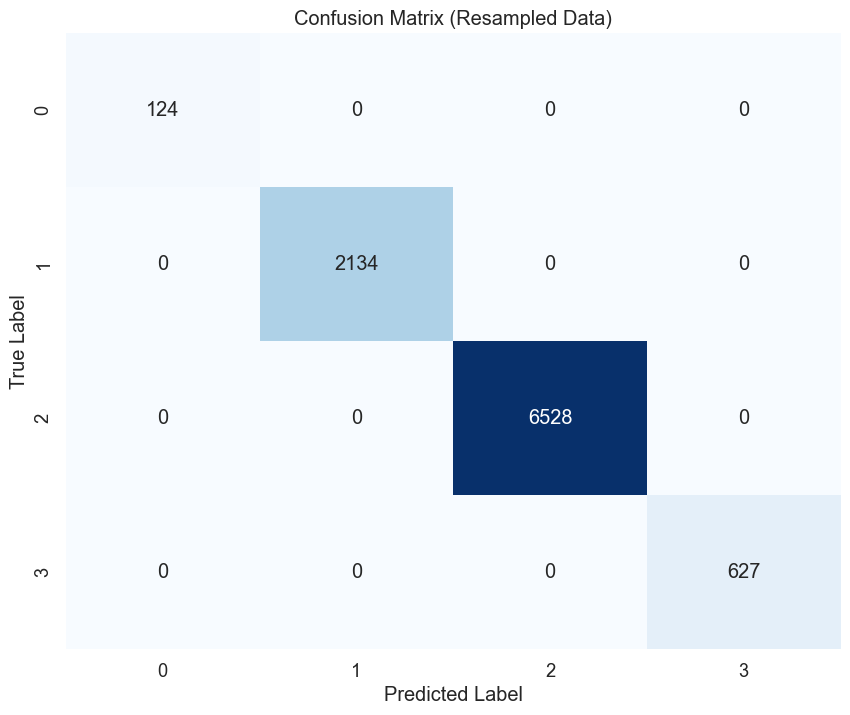

In [109]:
# Calculate predictions using the logistic regression model trained on the resampled data
y_pred_resampled = Decision_Tree_gridsearch.predict(X_val)

# Calculate the confusion matrix using the resampled predictions and true labels
conf_matrix_resampled = confusion_matrix(y_val, y_pred_resampled)

# Get class labels
class_labels_resampled = sorted(np.unique(y_val))

# Set seaborn style
sns.set(font_scale=1.2)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_resampled, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=class_labels_resampled, yticklabels=class_labels_resampled)
plt.title('Confusion Matrix (Resampled Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Interpretation of results**

It appears the model is exhibiting signs of overfitting despite applying some hyperparameter tuning

**Model's Accuracy**: Achieving perfect accuracy (1.0) on both the validation and test sets suggests that the model might be overfitting the training data, as it's fitting the data so closely that it struggles to generalize to new, unseen data.

**Classification Report**: The precision, recall, and F1-score metrics for all classes are also perfect (1.0), which further indicates that the model's predictions align perfectly with the actual class labels. This seem desirable, hence raising concerns about whether the model is learning to memorize the training data rather than capturing underlying patterns that generalize well to new data.

**Confusion Matrix**: The model suggests that there is a perfect classification for all classes. 

# Model 3

**k-Nearest Neighbors (KNN)**

In [94]:
## Creating KNN Pipeline using the resampled dataset
KNN_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('knn', KNeighborsClassifier(n_neighbors=5))  # KNN model
])

# Fit the pipeline to your training data
KNN_pipeline.fit(X_train_resampled, y_train_resampled)


Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [95]:
evaluate_model_performance(KNN_pipeline, X_val, y_val)

Validation Accuracy: 0.9418888770848826
Test Accuracy: 0.9361939466051907
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.73      0.82       124
           1       0.89      0.90      0.90      2134
           2       0.96      0.97      0.97      6528
           3       0.90      0.85      0.88       627

    accuracy                           0.94      9413
   macro avg       0.92      0.86      0.89      9413
weighted avg       0.94      0.94      0.94      9413

Confusion Matrix:
[[  91   14   10    9]
 [   4 1915  196   19]
 [   2  172 6324   30]
 [   1   43   47  536]]


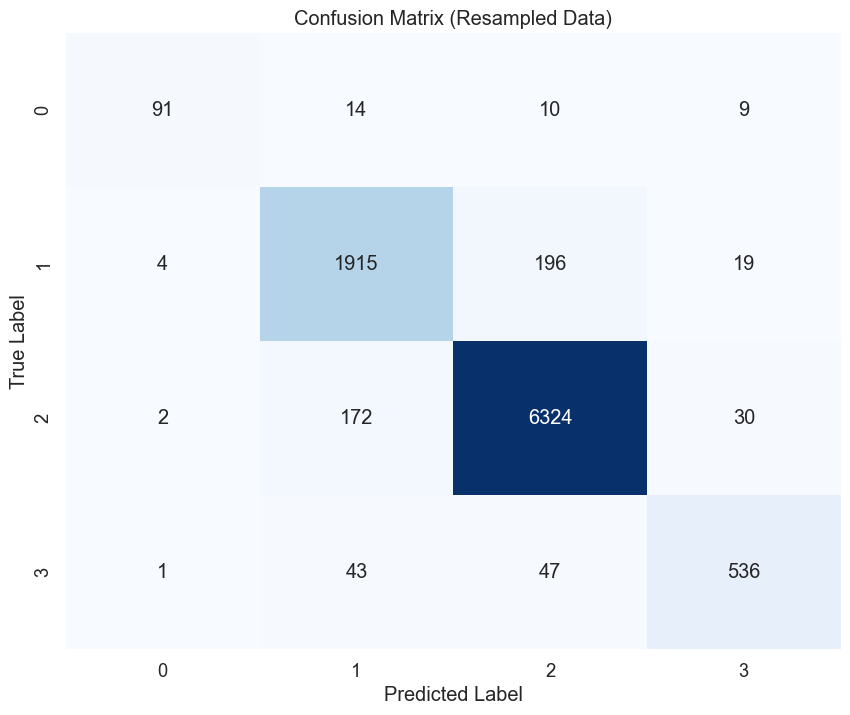

In [110]:
# Calculate predictions using the KNN model trained on the resampled data
y_pred_resampled = KNN_pipeline.predict(X_val)

# Calculate the confusion matrix using the resampled predictions and true labels
conf_matrix_resampled = confusion_matrix(y_val, y_pred_resampled)

# Get class labels
class_labels_resampled = sorted(np.unique(y_val))

# Set seaborn style
sns.set(font_scale=1.2)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_resampled, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=class_labels_resampled, yticklabels=class_labels_resampled)
plt.title('Confusion Matrix (Resampled Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Interpretation of the results**

**Accuracy**: The validation accuracy of 94.22% and test accuracy of 93.61% indicate that your KNN model correctly predicts the class labels for approximately 94% of instances in the validation set and 93.61% of instances in the test set.

**Classification Report**:

Precision:
Class 0: Precision of 0.93 means that among instances predicted as class 0, 93% are actually class 0.
Class 1: Precision of 0.89 suggests a relatively high precision for class 1 predictions.
Class 2: Precision of 0.96 indicates a very high precision for class 2 predictions.
Class 3: Precision of 0.91 suggests a high precision for class 3 predictions.

Recall:
Class 0: Recall of 0.73 implies that 73% of actual class 0 instances were correctly classified.
Class 1: Recall of 0.90 indicates a high recall for class 1 predictions.
Class 2: Recall of 0.97 suggests an excellent recall for class 2 predictions.
Class 3: Recall of 0.86 reflects a high recall for class 3 predictions.

F1-score:

**Confusion Matrix**:
The confusion matrix shows that the model performs well across all classes, with a higher number of correct predictions for classes 1, 2, and 3 compared to class 0.

**Improving our model via hyperparameter tuning**

In [96]:
# Define the grid of hyperparameters
KNN_grid = {
    'knn__n_neighbors': [3, 5],  # Number of neighbors to consider
    'knn__weights': ['uniform', 'distance'],  # Weighting method for predictions
    'knn__metric': ['euclidean', 'manhattan']  # Distance metric
}

# Perform Grid Search with cross-validation
KNN_gridsearch = GridSearchCV(KNN_pipeline, KNN_grid, cv=5, scoring='accuracy')
KNN_gridsearch.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': [3, 5],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [97]:
# Get the best parameters
best_params = KNN_gridsearch.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}


**Results**

**Best Hyperparameters**: {'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}

These parameters indicate that the best-performing KNN model was built using the Manhattan distance metric, considering 5 nearest neighbors, and employing distance-based weights for predictions.

In [98]:
evaluate_model_performance(KNN_gridsearch, X_val, y_val)

Validation Accuracy: 0.9594178264102836
Test Accuracy: 0.9554547482709899
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.60      0.73       124
           1       0.93      0.93      0.93      2134
           2       0.97      0.99      0.98      6528
           3       0.95      0.84      0.89       627

    accuracy                           0.96      9413
   macro avg       0.95      0.84      0.88      9413
weighted avg       0.96      0.96      0.96      9413

Confusion Matrix:
[[  74   18   21   11]
 [   3 1995  132    4]
 [   0   80 6435   13]
 [   1   43   56  527]]


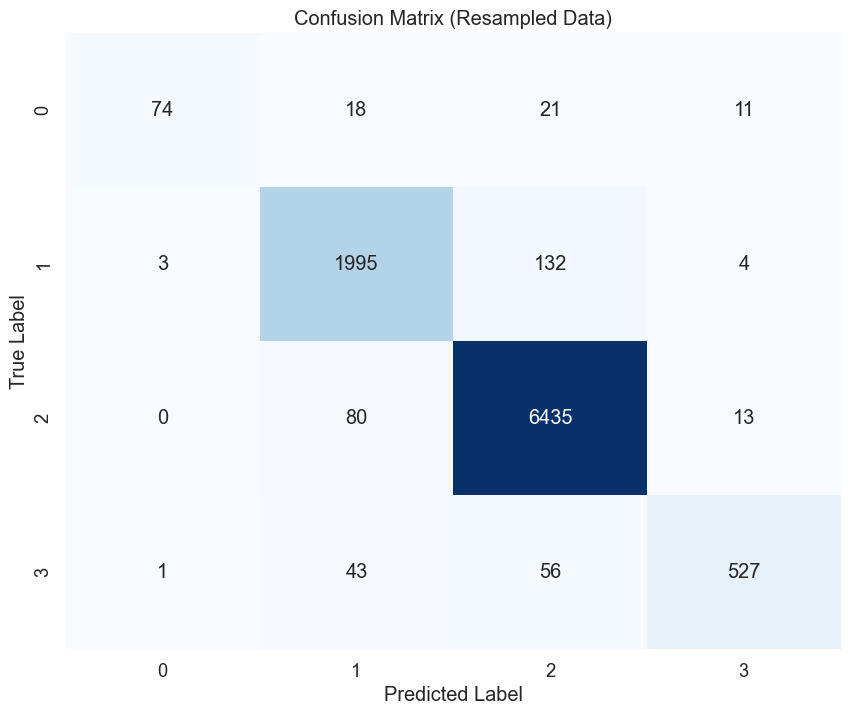

In [111]:
# Calculate predictions using the KNN_gridsearch model trained on the resampled data
y_pred_resampled = KNN_gridsearch.predict(X_val)

# Calculate the confusion matrix using the resampled predictions and true labels
conf_matrix_resampled = confusion_matrix(y_val, y_pred_resampled)

# Get class labels
class_labels_resampled = sorted(np.unique(y_val))

# Set seaborn style
sns.set(font_scale=1.2)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_resampled, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=class_labels_resampled, yticklabels=class_labels_resampled)
plt.title('Confusion Matrix (Resampled Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Model's results**

The model's performance has improved across various metrics, indicating that the hyperparameter tuning process has resulted in a better-performing KNN classifier.

**Validation Accuracy**: Increased from 0.942 to 0.960.

**Test Accuracy**: Increased from 0.936 to 0.956.

**Precision**: Improved across all classes, indicating better performance in correctly identifying each class.

**Recall**: Improved for most classes, indicating better performance in capturing true positives.

**F1-score**: Improved for most classes, suggesting a better balance between precision and recall.

**Confusion Matrix**: The number of misclassifications has generally decreased, with fewer false positives and false negatives.

# Model 4
**RandomForest**

In [99]:

# Creating RandoM Forest Pipeline 
RF_pipeline = Pipeline([
    ('ss', StandardScaler()),  # Standardize features
    ('rf', RandomForestClassifier(random_state=42))  # Random Forest classifier
])

# Fit the Random Forest pipeline to the training data
RF_pipeline.fit(X_train_resampled, y_train_resampled)


Pipeline(steps=[('ss', StandardScaler()),
                ('rf', RandomForestClassifier(random_state=42))])

In [100]:
evaluate_model_performance(RF_pipeline, X_val, y_val)

Validation Accuracy: 1.0
Test Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00      2134
           2       1.00      1.00      1.00      6528
           3       1.00      1.00      1.00       627

    accuracy                           1.00      9413
   macro avg       1.00      1.00      1.00      9413
weighted avg       1.00      1.00      1.00      9413

Confusion Matrix:
[[ 124    0    0    0]
 [   0 2134    0    0]
 [   0    0 6528    0]
 [   0    0    0  627]]


**interpretation of the results**

It appears the model is exhibiting signs of overfitting.

**Model's Accuracy**: Achieving perfect accuracy (1.0) on both the validation and test sets suggests that the model might be overfitting the training data, as it's fitting the data so closely that it struggles to generalize to new, unseen data.

**Classification Report**: The precision, recall, and F1-score metrics for all classes are also perfect (1.0), which further indicates that the model's predictions align perfectly with the actual class labels. This seem desirable, hence raising concerns about whether the model is learning to memorize the training data rather than capturing underlying patterns that generalize well to new data.

**Confusion Matrix**: The model suggests that there is a perfect classification for all classes.

**Improving Model Performance with Feature Importance Analysis**


In [101]:
RF_pipeline = Pipeline([
    ('ss', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

rf_grid = {
    "rf__n_estimators": [10, 30, 100],
    "rf__criterion": ["gini", "entropy"],
    "rf__max_depth": [None, 2, 6, 10, 20, 30],
    "rf__min_samples_split": [5, 10],
    "rf__min_samples_leaf": [1, 2, 3, 6],
}

rf_gridsearch = GridSearchCV(RF_pipeline, rf_grid, cv=5)

# Fitting the model
rf_gridsearch.fit(X_train_resampled, y_train_resampled)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'rf__criterion': ['gini', 'entropy'],
                         'rf__max_depth': [None, 2, 6, 10, 20, 30],
                         'rf__min_samples_leaf': [1, 2, 3, 6],
                         'rf__min_samples_split': [5, 10],
                         'rf__n_estimators': [10, 30, 100]})

In [102]:
# Get the best parameters
best_params = rf_gridsearch.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'rf__criterion': 'gini', 'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 30}


In [103]:
evaluate_model_performance(rf_gridsearch, X_val, y_val)

Validation Accuracy: 1.0
Test Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00      2134
           2       1.00      1.00      1.00      6528
           3       1.00      1.00      1.00       627

    accuracy                           1.00      9413
   macro avg       1.00      1.00      1.00      9413
weighted avg       1.00      1.00      1.00      9413

Confusion Matrix:
[[ 124    0    0    0]
 [   0 2134    0    0]
 [   0    0 6528    0]
 [   0    0    0  627]]


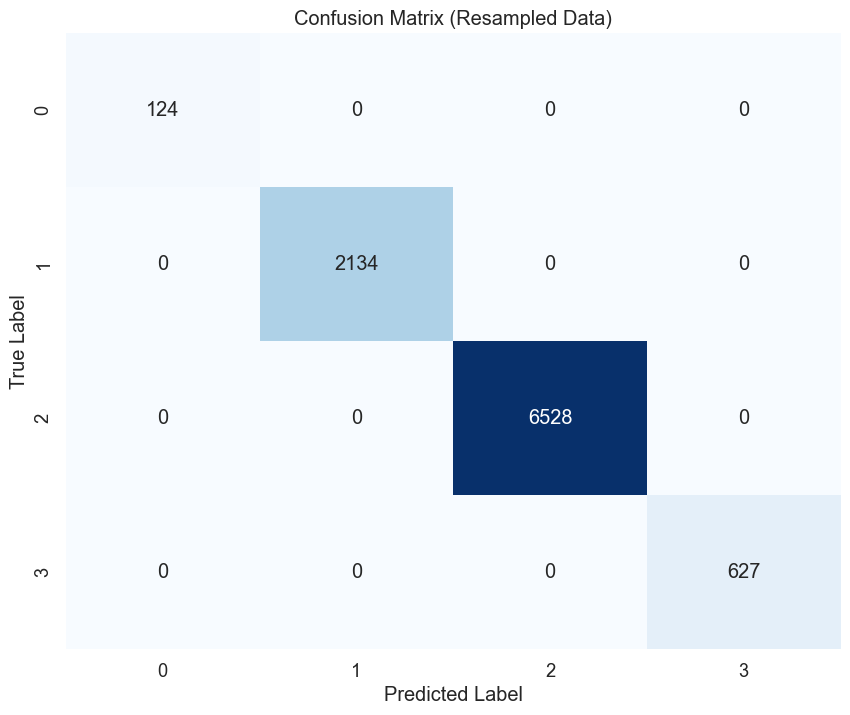

In [112]:
# Calculate predictions using the Random forest with grid search model trained on the resampled data
y_pred_resampled = rf_gridsearch.predict(X_val)

# Calculate the confusion matrix using the resampled predictions and true labels
conf_matrix_resampled = confusion_matrix(y_val, y_pred_resampled)

# Get class labels
class_labels_resampled = sorted(np.unique(y_val))

# Set seaborn style
sns.set(font_scale=1.2)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_resampled, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=class_labels_resampled, yticklabels=class_labels_resampled)
plt.title('Confusion Matrix (Resampled Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**interpretation of results**

It appears the model is exhibiting signs of overfitting despite applying some hyperparameter tuning

**Model's Accuracy**: Achieving perfect accuracy (1.0) on both the validation and test sets suggests that the model might be overfitting the training data, as it's fitting the data so closely that it struggles to generalize to new, unseen data.

**Classification Report**: The precision, recall, and F1-score metrics for all classes are also perfect (1.0), which further indicates that the model's predictions align perfectly with the actual class labels. This seem desirable, hence raising concerns about whether the model is learning to memorize the training data rather than capturing underlying patterns that generalize well to new data.

**Confusion Matrix**: The model suggests that there is a perfect classification for all classes.

**Visualizing most important features**

In [104]:
def plot_feature_importances(model):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]  # Sort importances in descending order and get indices
    feature_names = X_train_resampled.columns.values[indices]  # Get feature names in the sorted order
    sorted_importances = importances[indices]  # Get sorted importances

    plt.figure(figsize=(10, 8))
    plt.barh(range(len(indices)), sorted_importances, align='center')
    plt.yticks(range(len(indices)), feature_names)
    plt.xlabel('Feature importance')
    plt.title('Feature Importances (Ascending)')
    plt.show()

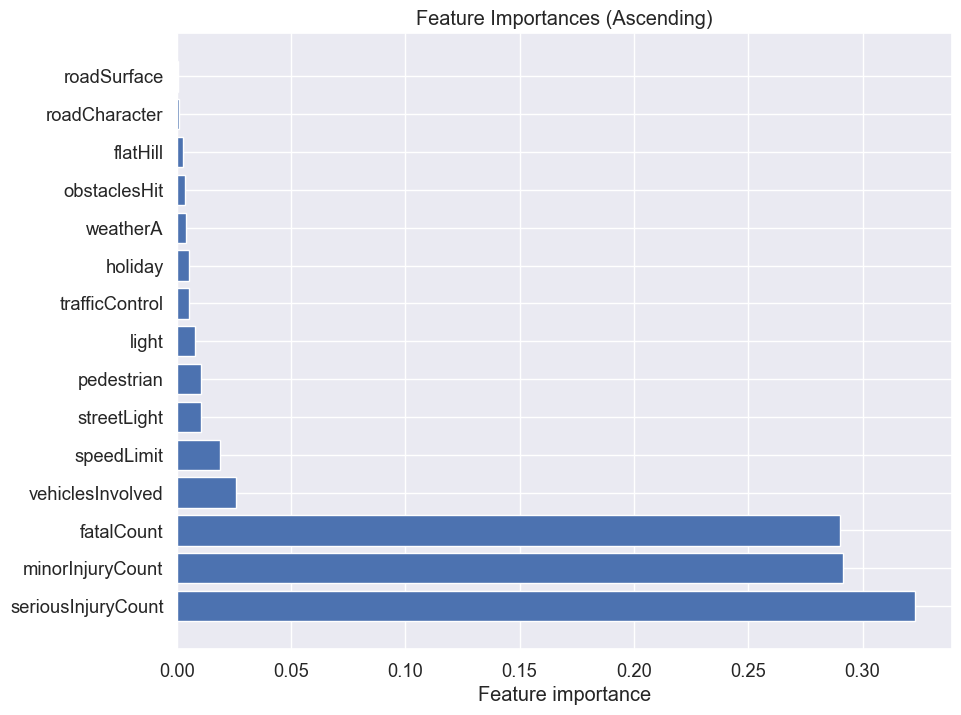

In [105]:
#Obtaining the optimal Random Forest Classifier
optimal_rf = RandomForestClassifier(criterion= 'gini',
 max_depth= None,
 min_samples_leaf =  1,
 min_samples_split = 5,
 n_estimators = 30)

#fitting the ptimal model
optimal_rf.fit(X_train_resampled, y_train_resampled)

plot_feature_importances(optimal_rf)

**Use of ten best features to improve on models performance**

fatalCount', 'holiday', 'light', 'minorInjuryCount', 'pedestrian', 'seriousInjuryCount', 'speedLimit', 'streetLight', 'trafficControl', 'vehiclesInvolved'

In [106]:
# Select only the important features from your dataset
X_train_selected = X_train_resampled[['fatalCount', 'holiday', 'light', 'minorInjuryCount', 'pedestrian', 'seriousInjuryCount', 'speedLimit', 'streetLight', 'trafficControl', 'vehiclesInvolved']]
X_test_selected = X_test[['fatalCount', 'holiday', 'light', 'minorInjuryCount', 'pedestrian', 'seriousInjuryCount', 'speedLimit', 'streetLight', 'trafficControl', 'vehiclesInvolved']]
X_val_selected = X_val[['fatalCount', 'holiday', 'light', 'minorInjuryCount', 'pedestrian', 'seriousInjuryCount', 'speedLimit', 'streetLight', 'trafficControl', 'vehiclesInvolved']]

In [107]:
## Creating Random Forest Regression Pipeline using the 10 important features
New_RF_pipeline = Pipeline([
    ('ss', StandardScaler()),  # StandardScaler for scaling the features if needed
    ('rf', RandomForestClassifier(criterion='gini', max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100))  # RandomForestClassifier with your selected hyperparameters
])

# Train the pipeline
New_RF_pipeline.fit(X_train_selected, y_train_resampled)

# Evaluate the pipeline on the validation set
val_accuracy = New_RF_pipeline.score(X_val_selected, y_val)
print("Validation Accuracy:", val_accuracy)



# Predict on the test set
y_pred_test = New_RF_pipeline.predict(X_test_selected)

# Calculate test accuracy
test_accuracy = New_RF_pipeline.score(X_test_selected, y_test)
print("Test Accuracy:", test_accuracy)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))


Validation Accuracy: 1.0
Test Accuracy: 1.0
Confusion Matrix:
[[ 194    0    0    0]
 [   0 3163    0    0]
 [   0    0 9187    0]
 [   0    0    0  903]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       194
           1       1.00      1.00      1.00      3163
           2       1.00      1.00      1.00      9187
           3       1.00      1.00      1.00       903

    accuracy                           1.00     13447
   macro avg       1.00      1.00      1.00     13447
weighted avg       1.00      1.00      1.00     13447



**Intepretation of results**

It appears the model is exhibiting signs of overfitting despite applying feature importance.

**Model's Accuracy**: Achieving perfect accuracy (1.0) on both the validation and test sets suggests that the model might be overfitting the training data, as it's fitting the data so closely that it struggles to generalize to new, unseen data.

**Classification Report**: The precision, recall, and F1-score metrics for all classes are also perfect (1.0), which further indicates that the model's predictions align perfectly with the actual class labels. This seem desirable, hence raising concerns about whether the model is learning to memorize the training data rather than capturing underlying patterns that generalize well to new data.

**Confusion Matrix**: The model suggests that there is a perfect classification for all classes.

# Model 5

**XGBoost**

In [115]:
pip install xgboost



  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 326.1 kB/s eta 0:05:06
   ---------------------------------------- 0.1/99.8 MB 535.8 kB/s eta 0:03:06
   ---------------------------------------- 0.1/99.8 MB 535.8 kB/s eta 0:03:06
   ---------------------------------------- 0.2/99.8 MB 485.3 kB/s eta 0:03:26
   ---------------------------------------- 0.2/99.8 MB 485.3 kB/s eta 0:03:26
   ---------------------------------------- 0.2/99.8 MB 430.6 kB/s eta 0:03:52
   ---------------------------------------- 0.3/99.8 MB 486.8 kB/s eta 0:03:25
   ----------------------------

In [116]:
#create a model
from xgboost import XGBClassifier


xgb_pipeline = Pipeline([('ss', StandardScaler()),
                        ('xgb', XGBClassifier(random_state=42))])


In [117]:
#fit the model
xgb_pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('ss', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [118]:
evaluate_model_performance(xgb_pipeline, X_val, y_val)

Validation Accuracy: 1.0
Test Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00      2134
           2       1.00      1.00      1.00      6528
           3       1.00      1.00      1.00       627

    accuracy                           1.00      9413
   macro avg       1.00      1.00      1.00      9413
weighted avg       1.00      1.00      1.00      9413

Confusion Matrix:
[[ 124    0    0    0]
 [   0 2134    0    0]
 [   0    0 6528    0]
 [   0    0    0  627]]


It appears the model is exhibiting signs of overfitting

**Model's Accuracy**: Achieving perfect accuracy (1.0) on both the validation and test sets suggests that the model might be overfitting the training data, as it's fitting the data so closely that it struggles to generalize to new, unseen data.

**Classification Report**: The precision, recall, and F1-score metrics for all classes are also perfect (1.0), which further indicates that the model's predictions align perfectly with the actual class labels. This seem desirable, hence raising concerns about whether the model is learning to memorize the training data rather than capturing underlying patterns that generalize well to new data.

**Confusion Matrix**: The model suggests that there is a perfect classification for all classes.

**Use of hyperparameter tuning to improve on our model**

In [119]:
param_grid_xgb = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5],
    'xgb__learning_rate': [0.1, 0.01],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0]
}

# Perform Grid Search with cross-validation
xgb_gridsearch = GridSearchCV(xgb_pipeline, param_grid_xgb, cv=5, scoring='accuracy')
xgb_gridsearch.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params = xgb_gridsearch.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 100, 'xgb__subsample': 0.8}


In [120]:
evaluate_model_performance(xgb_gridsearch, X_val, y_val)

Validation Accuracy: 1.0
Test Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00      2134
           2       1.00      1.00      1.00      6528
           3       1.00      1.00      1.00       627

    accuracy                           1.00      9413
   macro avg       1.00      1.00      1.00      9413
weighted avg       1.00      1.00      1.00      9413

Confusion Matrix:
[[ 124    0    0    0]
 [   0 2134    0    0]
 [   0    0 6528    0]
 [   0    0    0  627]]


**Interpretation**

It appears the model is exhibiting signs of overfitting despite applying some hyperparameter tuning

**Model's Accuracy**: Achieving perfect accuracy (1.0) on both the validation and test sets suggests that the model might be overfitting the training data, as it's fitting the data so closely that it struggles to generalize to new, unseen data.

**Classification Report**: The precision, recall, and F1-score metrics for all classes are also perfect (1.0), which further indicates that the model's predictions align perfectly with the actual class labels. This seem desirable, hence raising concerns about whether the model is learning to memorize the training data rather than capturing underlying patterns that generalize well to new data.

**Confusion Matrix**: The model suggests that there is a perfect classification for all classes.

**Feature Importance**

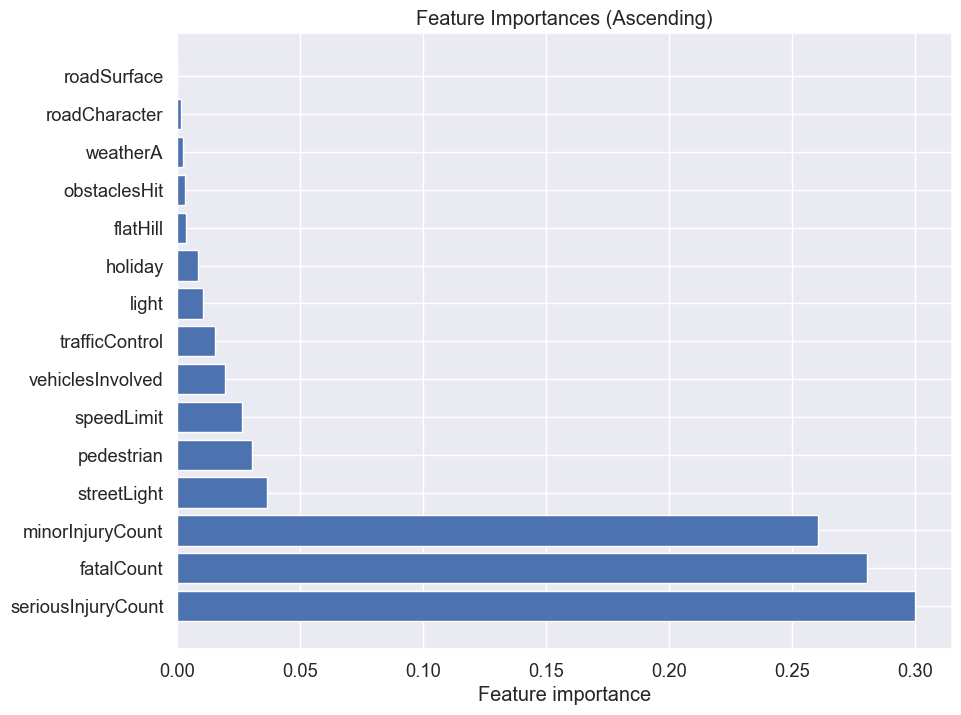

In [121]:
optimal_xgb =  XGBClassifier(
        colsample_bytree=0.8,
        learning_rate=0.1,
        max_depth=3,
        n_estimators=100,
        subsample=0.8
)

# Fit the XGBoost pipeline
optimal_xgb.fit(X_train_resampled, y_train_resampled)

# Plot feature importances
plot_feature_importances(optimal_xgb)

**use feature importance to reduce variables, and improve our model**

In [122]:
X_train_select = X_train_resampled[['fatalCount', 'holiday', 'obstaclesHit', 'minorInjuryCount', 'pedestrian', 'seriousInjuryCount', 'speedLimit', 'flatHill', 'streetLight', 'vehiclesInvolved']]
X_test_select = X_test[['fatalCount', 'holiday', 'obstaclesHit', 'minorInjuryCount', 'pedestrian', 'seriousInjuryCount', 'speedLimit', 'flatHill', 'streetLight', 'vehiclesInvolved']]
X_val_select = X_val[['fatalCount', 'holiday', 'obstaclesHit', 'minorInjuryCount', 'pedestrian', 'seriousInjuryCount', 'speedLimit', 'flatHill', 'streetLight', 'vehiclesInvolved']]

In [123]:

# Define the pipeline with XGBClassifier
New_XGB_pipeline = Pipeline([
    ('ss', StandardScaler()),  # StandardScaler for scaling the features if needed
    ('xgb', XGBClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8))  # XGBClassifier with your selected hyperparameters
])

# Train the pipeline
New_XGB_pipeline.fit(X_train_selected, y_train_resampled)

# Evaluate the pipeline on the validation set
val_accuracy = New_XGB_pipeline.score(X_val_selected, y_val)
print("Validation Accuracy:", val_accuracy)

# Predict on the test set
y_pred_test = New_XGB_pipeline.predict(X_test_selected)

# Calculate test accuracy
test_accuracy = New_XGB_pipeline.score(X_test_selected, y_test)
print("Test Accuracy:", test_accuracy)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))


Validation Accuracy: 1.0
Test Accuracy: 1.0
Confusion Matrix:
[[ 194    0    0    0]
 [   0 3163    0    0]
 [   0    0 9187    0]
 [   0    0    0  903]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       194
           1       1.00      1.00      1.00      3163
           2       1.00      1.00      1.00      9187
           3       1.00      1.00      1.00       903

    accuracy                           1.00     13447
   macro avg       1.00      1.00      1.00     13447
weighted avg       1.00      1.00      1.00     13447



It appears the model is exhibiting signs of overfitting despite applying feature importance.

**Model's Accuracy**: Achieving perfect accuracy (1.0) on both the validation and test sets suggests that the model might be overfitting the training data, as it's fitting the data so closely that it struggles to generalize to new, unseen data.

**Classification Report**: The precision, recall, and F1-score metrics for all classes are also perfect (1.0), which further indicates that the model's predictions align perfectly with the actual class labels. This seem desirable, hence raising concerns about whether the model is learning to memorize the training data rather than capturing underlying patterns that generalize well to new data.

**Confusion Matrix**: The model suggests that there is a perfect classification for all classes.

# Model's Result

Best Performing Models.

Logistic Regression:
Validation Accuracy: 0.9857
Test Accuracy: 0.9871

K-Nearest Neighbors (KNN):
Validation Accuracy: 0.9422
Test Accuracy: 0.9361

KNN with GridSearchCV:
Validation Accuracy: 0.9603
Test Accuracy: 0.9556

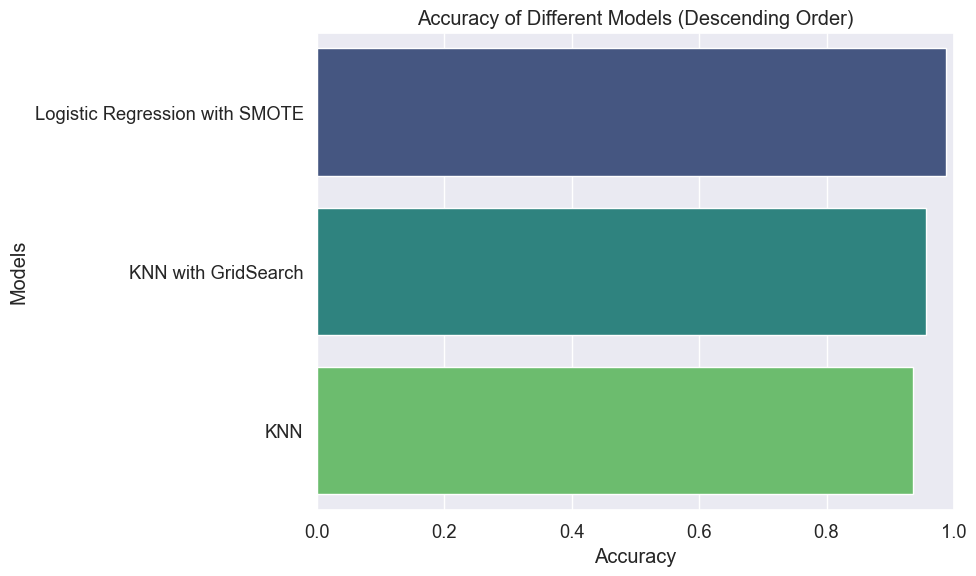

In [126]:
# Define the models and their accuracies that performed well with no overfitting
models = ['Logistic Regression with SMOTE', 'KNN', 'KNN with GridSearch']
accuracies = [ 0.9873, 0.9361, 0.9556]

# Sort the models and accuracies in descending order of accuracy
sorted_indices = sorted(range(len(accuracies)), key=lambda i: accuracies[i], reverse=True)
sorted_models = [models[i] for i in sorted_indices]
sorted_accuracies = [accuracies[i] for i in sorted_indices]

# Create the plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_accuracies, y=sorted_models, palette='viridis')
plt.title('Accuracy of Different Models (Descending Order)')
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.xlim(0, 1)  # Set x-axis limits from 0 to 1
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
# Saving KNN with gridsearch CV as a pickle file to be used in deployment
with open('optimized_KNN_model.pkl', 'wb') as file:
    pickle.dump(KNN_gridsearch.best_estimator_, file)

# Conclusion

1.Based on the evaluation of various regression and classification models, it is evident that machine learning algorithms can effectively predict accident severity.

The Logistic Regression models achieved an of accuracy 98.73.
KNN models achieved accuracies of approximately 93.61% and 95.56%, respectively.
Both of these models provide essential quantitative insights into predicting road accidents and crash severity. They offer valuable information for improving road safety by accurately assessing accident likelihood and severity, helping stakeholders make informed decisions to prevent accidents and minimize their impact.

2.Through depth analysis, we successfully identified factors that significantly influence crash occurrences. These factors do include 'speedLimit ', 'flatHill', 'streetLight', 'vehiclesInvolved', play a pivotal role in understanding and predicting road accidents

2.Based on our crash severity analysis:
Fatalities and Injuries: The more fatalities and serious injuries, the worse the crash.
Context Matters: Holidays, poor lighting, and number of pedestrians involved make crashes more severe.
Road Conditions: Speed limits, street lighting, and traffic control affect crash severity.
Number of Vehicles: More vehicles usually mean a more severe crash..

3.Considering risk factors like hilly terrain, misty and foggy weather conditions, absence of streetlights, dark periods, and high-speed limits, which make accidents more severe. Understanding these risks helps us improve how we allocate resources.


# Recommendations

**Safety Campaigns**: 
Implement targeted road safety campaigns focusing on the identified risk factors to raise awareness among road users and promote responsible driving practices in challenging terrain and low-light areas.

**Continuous Model Refinement**:
More data from different countries all over the world need to do a more thorough documentation of road accidents occuring so as to have more sufficient data to build more accurate predictive models to assess severity of road accidents.

**Enhanced Resource Allocation** 
Directing additional resources towards addressing key factors, like hilly terrain, lack of streetlights, dark periods, and high-speed limits, which significantly influence the severity of fatal accidents. Prioritizing resource allocation to mitigate these specific risk factors can lead to more effective accident prevention and response strategies.

**Enhancing Road Safety During Mist and Foggy Conditions**

Most fatal accidents do occur when the weather is mist and foggy and hence we do recommend:

Improve visibility during mist or fog, including reflective road signs and vehicle lighting.

Use advanced weather forecasting to provide real-time alerts.

Educate drivers on safe practices during foggy conditions.

Upgrade roadside infrastructure to alert drivers of fog conditions